In [1]:
import os
import subprocess
import h5py
import matplotlib.pyplot as plt
import string
import numpy as np
from glob import glob
from skimage.io import imread
from skimage.transform import downscale_local_mean
import pandas as pd
import seaborn as sns
from pywavesurfer import ws
from scipy.io import savemat,loadmat
import numpy as np
from pywavesurfer import ws

#### New screening data info

In [2]:
plates = []
for i in range(5,17):
    plates.append('P%sa-20230508_wHaloCaMP' %str(i).zfill(2))
imgPath = r'Z:\GECIScreenData\GECI_Imaging_Data\wHaloCaMP'
date = '20230522_wHaloCaMP_raw'
savePath = r'Y:\GECI_screening\wHaloCaMP\combo & single mutants 2023'+'\\'+date
if not os.path.exists(savePath):
    os.makedirs(savePath)
print(os.path.exists(savePath))
plates

True


['P05a-20230508_wHaloCaMP',
 'P06a-20230508_wHaloCaMP',
 'P07a-20230508_wHaloCaMP',
 'P08a-20230508_wHaloCaMP',
 'P09a-20230508_wHaloCaMP',
 'P10a-20230508_wHaloCaMP',
 'P11a-20230508_wHaloCaMP',
 'P12a-20230508_wHaloCaMP',
 'P13a-20230508_wHaloCaMP',
 'P14a-20230508_wHaloCaMP',
 'P15a-20230508_wHaloCaMP',
 'P16a-20230508_wHaloCaMP']

#### Segmentation with ilastik

- Create 96 well layout

In [3]:
Wells = []
import string
for l in string.ascii_uppercase[:8]:
    for n in range(2,12):
        Wells.append('%s%s' %(l,str(n).zfill(2)))
len(Wells)

80

- Specify location of ilastik installation and project (trained classifier)

In [4]:
ilastik_location = r'C:\Program Files\ilastik-1.3.3post3'
ilastik_project = r'C:\Users\zhengj10\Desktop\Jihong\wHaloCaMP\FS screening\Headless_operation_trained_with_red_images.ilp'
os.chdir(ilastik_location)

- Run ilastik headless mode

20230522_wHaloCaMP_raw P05a-20230508_wHaloCaMP
80
A02
A03
A04
A05
A06
A07
A08
A09
A10
A11
B02
B03
B04
B05
B06
B07
B08
B09
B10
B11
C02
C03
C04
C05
C06
C07
C08
C09
C10
C11
D02
D03
D04
D05
D06
D07
D08
D09
D10
D11
E02
E03
E04
E05
E06
E07
E08
E09
E10
E11
F02
F03
F04
F05
F06
F07
F08
F09
F10
F11
G02
G03
G04
G05
G06
G07
G08
G09
G10
G11
H02
H03
H04
H05
H06
H07
H08
H09
H10
H11


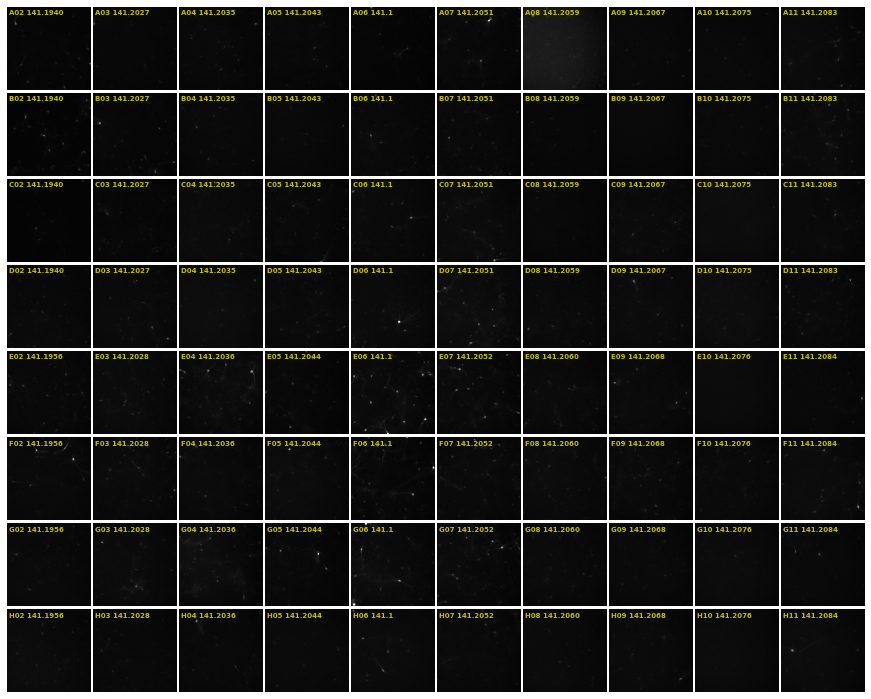

20230522_wHaloCaMP_raw P06a-20230508_wHaloCaMP
80
A02
A03
A04
A05
A06
A07
A08
A09
A10
A11
B02
B03
B04
B05
B06
B07
B08
B09
B10
B11
C02
C03
C04
C05
C06
C07
C08
C09
C10
C11
D02
D03
D04
D05
D06
D07
D08
D09
D10
D11
E02
E03
E04
E05
E06
E07
E08
E09
E10
E11
F02
F03
F04
F05
F06
F07
F08
F09
F10
F11
G02
G03
G04
G05
G06
G07
G08
G09
G10
G11
H02
H03
H04
H05
H06
H07
H08
H09
H10
H11


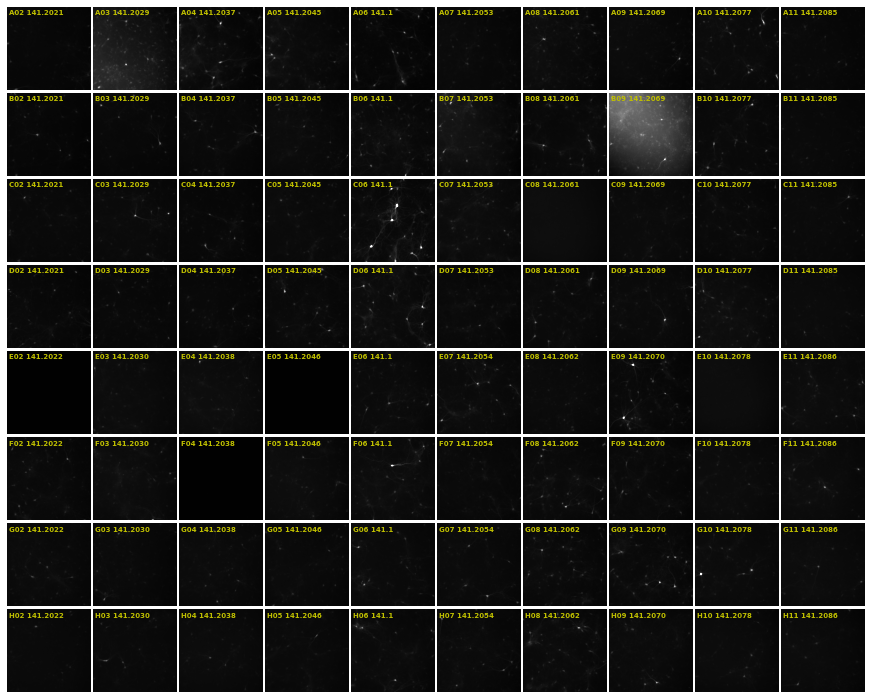

20230522_wHaloCaMP_raw P07a-20230508_wHaloCaMP
80
A02
A03
A04
A05
A06
A07
A08
A09
A10
A11
B02
B03
B04
B05
B06
B07
B08
B09
B10
B11
C02
C03
C04
C05
C06
C07
C08
C09
C10
C11
D02
D03
D04
D05
D06
D07
D08
D09
D10
D11
E02
E03
E04
E05
E06
E07
E08
E09
E10
E11
F02
F03
F04
F05
F06
F07
F08
F09
F10
F11
G02
G03
G04
G05
G06
G07
G08
G09
G10
G11
H02
H03
H04
H05
H06
H07
H08
H09
H10
H11


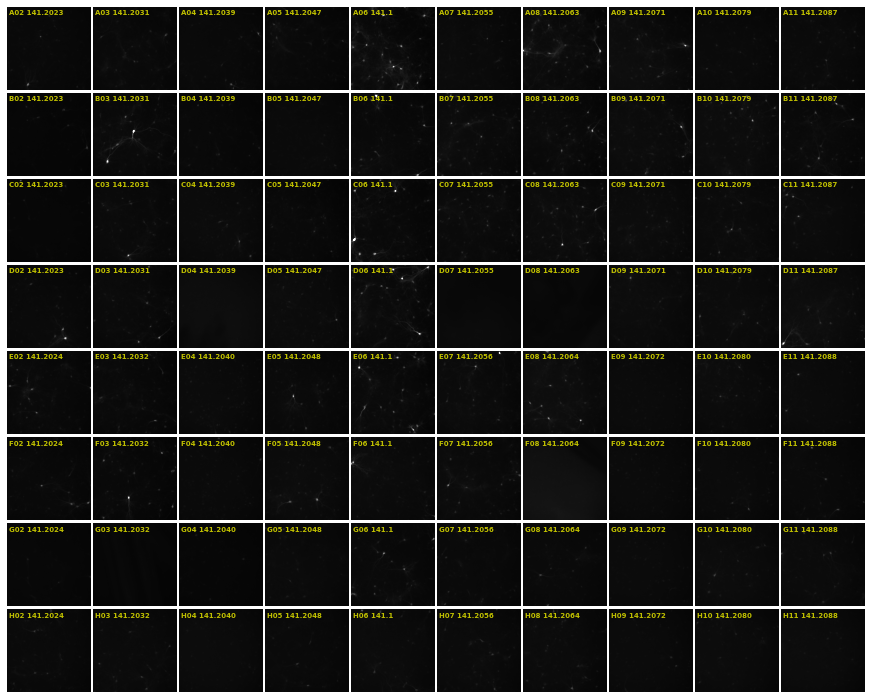

20230522_wHaloCaMP_raw P08a-20230508_wHaloCaMP
76
A02
A03
A04
A05
A06
A07
A09
A10
A11
B02
B03
B04
B05
B06
B07
B09
B10
B11
C02
C03
C04
C05
C06
C07
C09
C10
C11
D02
D03
D04
D05
D06
D07
D09
D10
D11
E02
E03
E04
E05
E06
E07
E08
E09
E10
E11
F02
F03
F04
F05
F06
F07
F08
F09
F10
F11
G02
G03
G04
G05
G06
G07
G08
G09
G10
G11
H02
H03
H04
H05
H06
H07
H08
H09
H10
H11


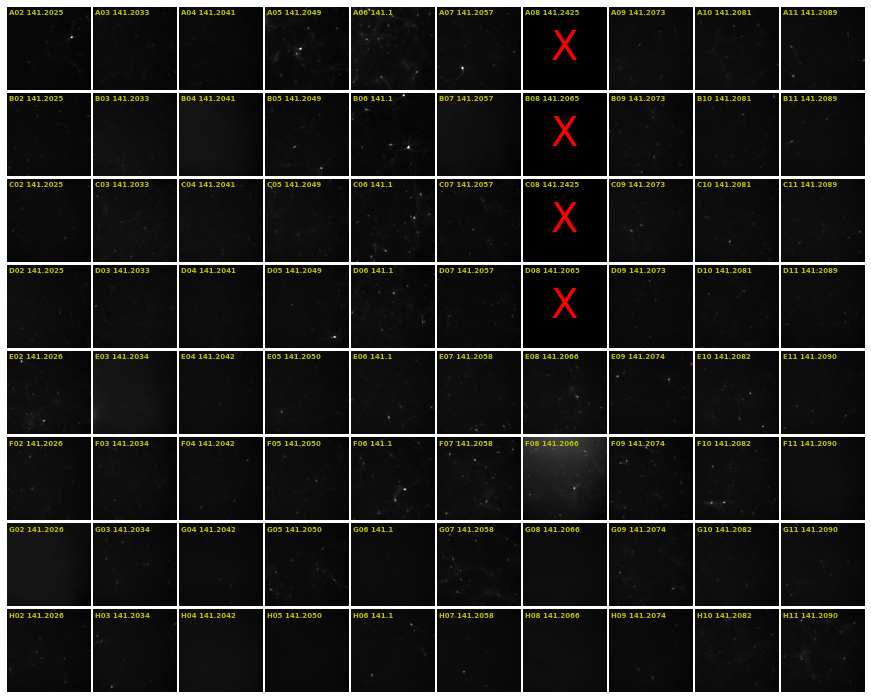

20230522_wHaloCaMP_raw P09a-20230508_wHaloCaMP
48
A02
A03
A04
A05
A06
A07
B02
B03
B04
B05
B06
B07
C02
C03
C04
C05
C06
C07
D02
D03
D04
D05
D06
D07
E02
E03
E04
E05
E06
E07
F02
F03
F04
F05
F06
F07
G02
G03
G04
G05
G06
G07
H02
H03
H04
H05
H06
H07


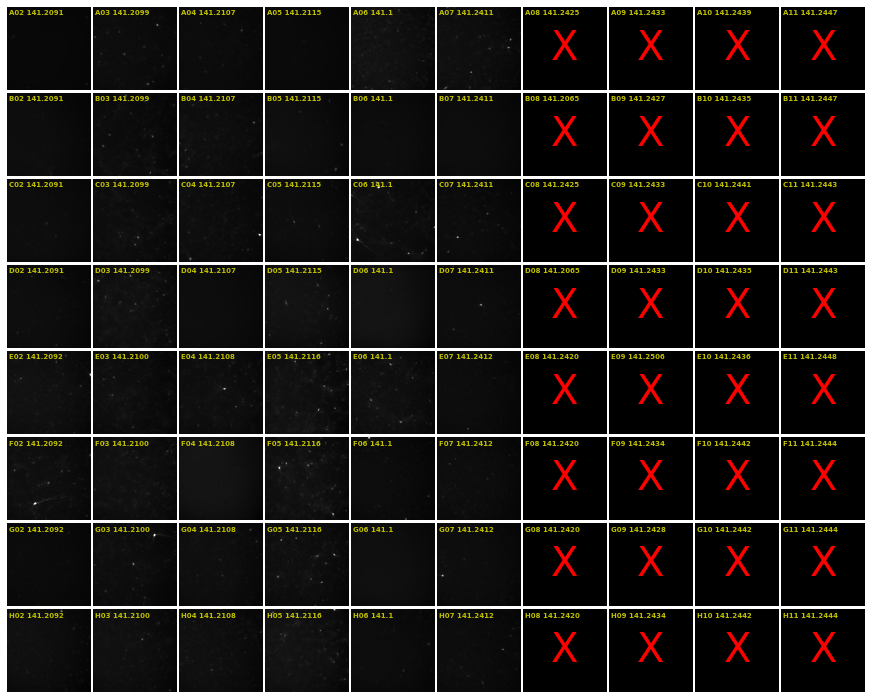

20230522_wHaloCaMP_raw P10a-20230508_wHaloCaMP
80
A02
A03
A04
A05
A06
A07
A08
A09
A10
A11
B02
B03
B04
B05
B06
B07
B08
B09
B10
B11
C02
C03
C04
C05
C06
C07
C08
C09
C10
C11
D02
D03
D04
D05
D06
D07
D08
D09
D10
D11
E02
E03
E04
E05
E06
E07
E08
E09
E10
E11
F02
F03
F04
F05
F06
F07
F08
F09
F10
F11
G02
G03
G04
G05
G06
G07
G08
G09
G10
G11
H02
H03
H04
H05
H06
H07
H08
H09
H10
H11


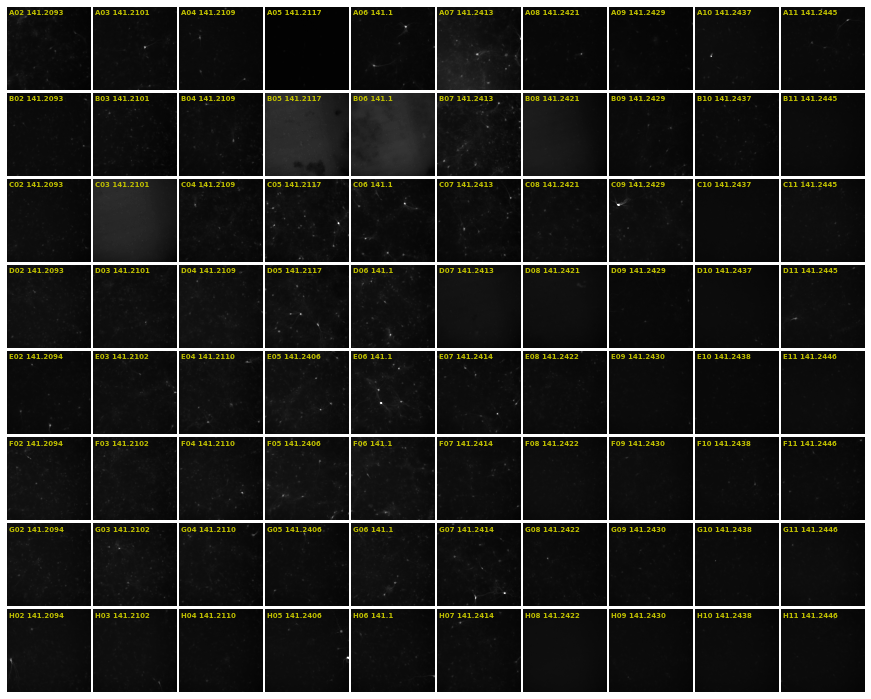

20230522_wHaloCaMP_raw P11a-20230508_wHaloCaMP
64
A02
A03
A04
A05
A06
A07
A08
A09
B02
B03
B04
B05
B06
B07
B08
B09
C02
C03
C04
C05
C06
C07
C08
C09
D02
D03
D04
D05
D06
D07
D08
D09
E02
E03
E04
E05
E06
E07
E08
E09
F02
F03
F04
F05
F06
F07
F08
F09
G02
G03
G04
G05
G06
G07
G08
G09
H02
H03
H04
H05
H06
H07
H08
H09


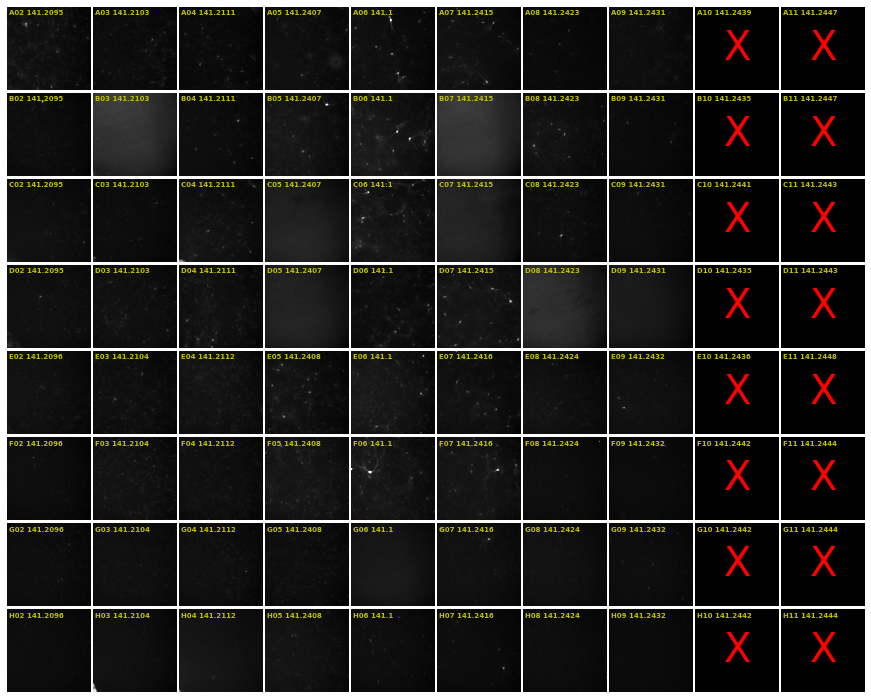

20230522_wHaloCaMP_raw P12a-20230508_wHaloCaMP
60
A02
A03
A04
A05
A06
A07
A11
B02
B03
B04
B05
B06
B07
B11
C02
C03
C04
C05
C06
C07
C11
D02
D03
D04
D05
D06
D07
D11
E02
E03
E04
E05
E06
E07
E08
E11
F02
F03
F04
F05
F06
F07
F08
F11
G02
G03
G04
G05
G06
G07
G08
G11
H02
H03
H04
H05
H06
H07
H08
H11


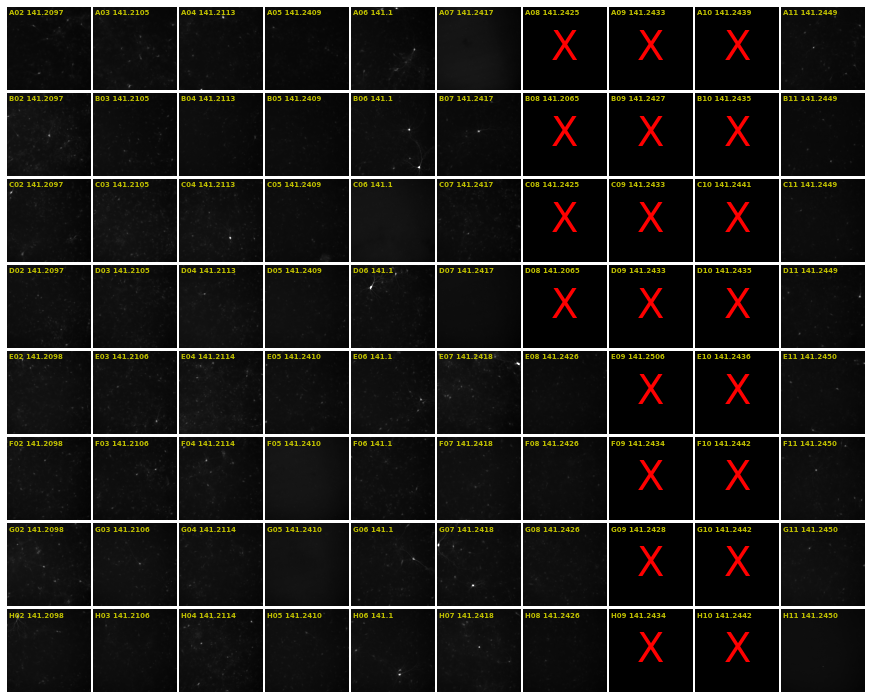

20230522_wHaloCaMP_raw P13a-20230508_wHaloCaMP
76
A02
A03
A04
A06
A07
A08
A09
A10
A11
B02
B03
B04
B06
B07
B08
B09
B10
B11
C02
C03
C04
C06
C07
C08
C09
C10
C11
D02
D03
D04
D06
D07
D08
D09
D10
D11
E02
E03
E04
E05
E06
E07
E08
E09
E10
E11
F02
F03
F04
F05
F06
F07
F08
F09
F10
F11
G02
G03
G04
G05
G06
G07
G08
G09
G10
G11
H02
H03
H04
H05
H06
H07
H08
H09
H10
H11


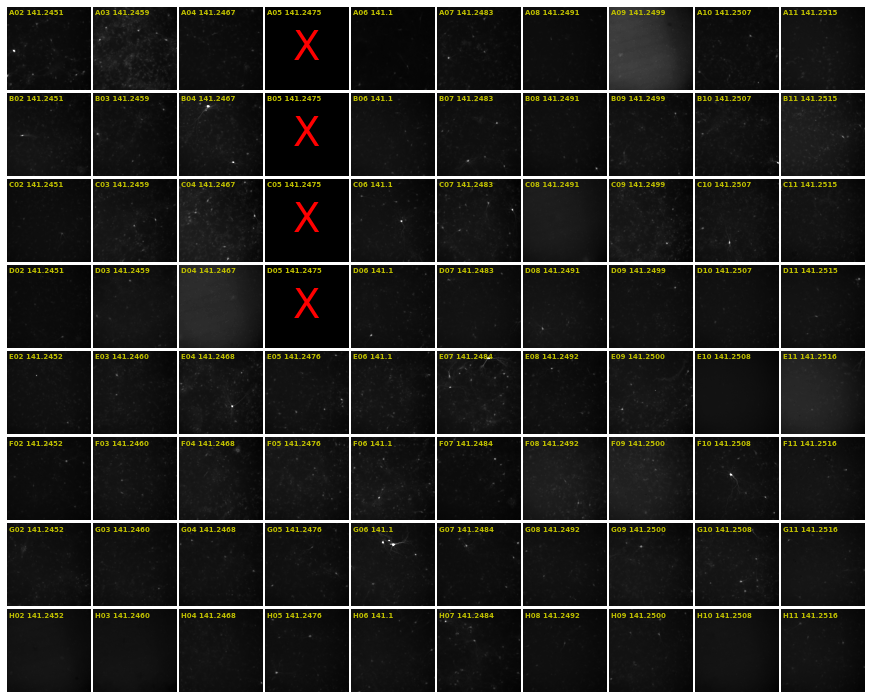

20230522_wHaloCaMP_raw P14a-20230508_wHaloCaMP
80
A02
A03
A04
A05
A06
A07
A08
A09
A10
A11
B02
B03
B04
B05
B06
B07
B08
B09
B10
B11
C02
C03
C04
C05
C06
C07
C08
C09
C10
C11
D02
D03
D04
D05
D06
D07
D08
D09
D10
D11
E02
E03
E04
E05
E06
E07
E08
E09
E10
E11
F02
F03
F04
F05
F06
F07
F08
F09
F10
F11
G02
G03
G04
G05
G06
G07
G08
G09
G10
G11
H02
H03
H04
H05
H06
H07
H08
H09
H10
H11


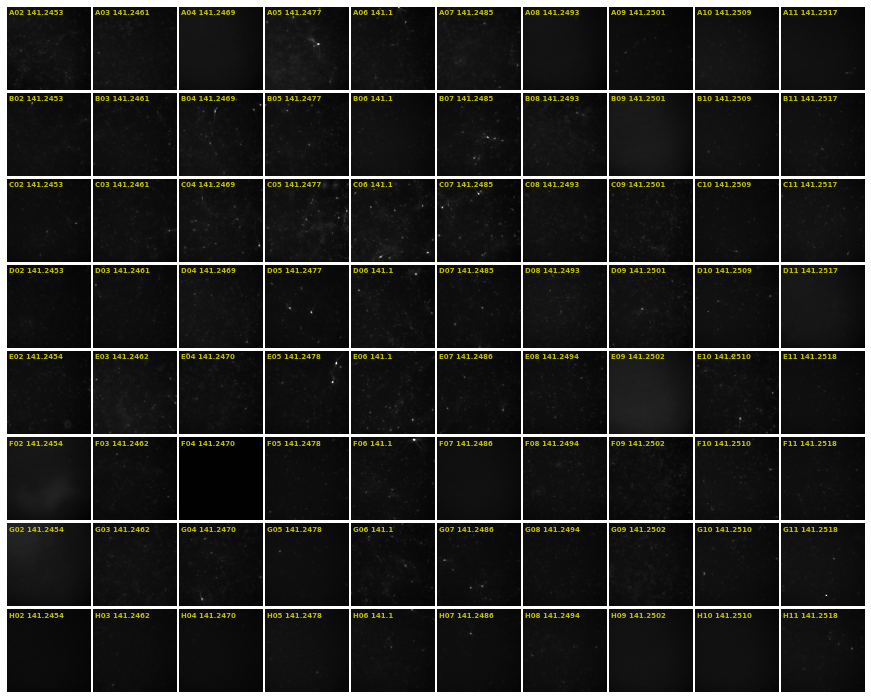

20230522_wHaloCaMP_raw P15a-20230508_wHaloCaMP
80
A02
A03
A04
A05
A06
A07
A08
A09
A10
A11
B02
B03
B04
B05
B06
B07
B08
B09
B10
B11
C02
C03
C04
C05
C06
C07
C08
C09
C10
C11
D02
D03
D04
D05
D06
D07
D08
D09
D10
D11
E02
E03
E04
E05
E06
E07
E08
E09
E10
E11
F02
F03
F04
F05
F06
F07
F08
F09
F10
F11
G02
G03
G04
G05
G06
G07
G08
G09
G10
G11
H02
H03
H04
H05
H06
H07
H08
H09
H10
H11


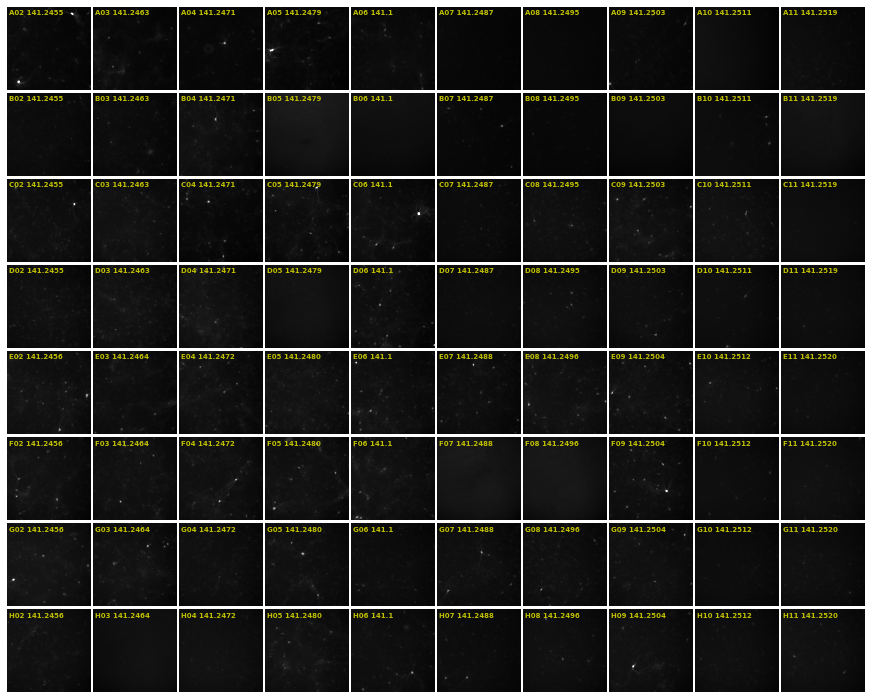

20230522_wHaloCaMP_raw P16a-20230508_wHaloCaMP
64
A04
A05
A06
A07
A08
A09
A10
A11
B04
B05
B06
B07
B08
B09
B10
B11
C04
C05
C06
C07
C08
C09
C10
C11
D04
D05
D06
D07
D08
D09
D10
D11
E02
E03
E04
E05
E06
E07
E08
E11
F02
F03
F04
F05
F06
F07
F08
F11
G02
G03
G04
G05
G06
G07
G08
G11
H02
H03
H04
H05
H06
H07
H08
H11


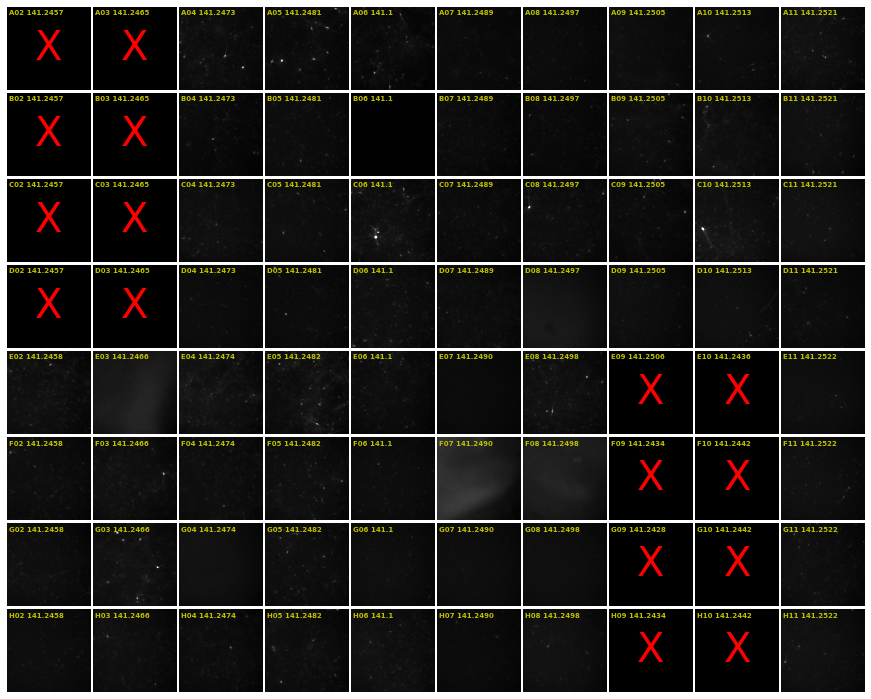

In [6]:
h5Files = glob(os.path.join(imgPath,date)+'\\*.h5')
for plate in plates:
    h5File = [f for f in h5Files if plate.split('_')[0] in f]
    print(date, plate)
    wells = [w for w in os.listdir(os.path.join(imgPath,date,plate,'imaging')) if 'Well' in w]
    wells = sorted(wells)
    print(len(wells))
    plt.figure(figsize=[12,9.6])
    i=1
    for w_ab in Wells:
        ax = plt.subplot(8,10,i)
        w = glob(os.path.join(imgPath,date,plate,'imaging')+'\\*'+w_ab)
        if len(w)==0:
            try:
                img = glob(os.path.join(imgPath,date,'doNotAnalyze')+'\\*%s*001FP*.tif' %w_ab)[0]
                c = os.path.basename(img).split('_')[2].replace('dot','.')
                w = os.path.basename(img).split('_')[1].split('-')[1]
                ax.imshow(np.zeros([512,512]),cmap='gray')
                ax.text(10,50,w+' '+c,color='y',weight='bold',size=7)
                ax.text(256,256,'X',color='r',size=40,ha='center',va='center')
            except:
                print(w_ab + ' data unavailable')
                w = w_ab
                ax.imshow(np.zeros([512,512]),cmap='gray')
                ax.text(10,50,w,color='y',weight='bold',size=7)
                ax.text(256,256,'X',color='r',size=40,ha='center',va='center')
        else:
            w = w[0]
            indir = os.path.join(w,'Segment')
            infiles = os.listdir(indir)
            for infile in infiles:
                if 'noStim' in infile:
                    command = 'run-ilastik.bat --headless --project="%s" --export_source="simple segmentation" --output_filename_format="%s\\ilastik_segmentation.h5" --raw_data="%s\\%s"' % (
                        ilastik_project,
                        indir,
                        indir,
                        infile)
                    subprocess.call(command, shell=True)

            ref = glob(w+'\\segment\\*noStim*.tif')[0]
            ref_arr = imread(ref)
            print(w[-3:])
            img = glob(w+'\\*001FP*.tif')[0]
            c = os.path.basename(img).split('_')[2].replace('dot','.')
            ax.imshow(ref_arr,cmap='gray',vmax=15000)
            ax.text(10,50,w[-3:]+' '+c,color='y',weight='bold',size=7)
        ax.axis('off')
        i+=1      
    plt.tight_layout(pad=0.3)
    plt.savefig(savePath+'\\ref_image_%s.svg' %plate.split('_')[0],format='svg')
    plt.show()
    plt.close()

- Show segmentation image and compute dFF

20230522_wHaloCaMP_raw P05a-20230508_wHaloCaMP


C:\Users\zhengj10\Anaconda3\lib\site-packages\pywavesurfer\ws.py:46: RuntimeWarning: You are reading a WaveSurfer file version this module was not tested with: file version 1.0.5, latest version tested: 0.97
  warnings.warn('You are reading a WaveSurfer file version this module was not tested with: '


A02
A03
A04
A05
A06
A07
A08
A09
A10
A11
B02
B03
B04
B05
B06
B07
B08
B09


C:\Users\zhengj10\AppData\Local\Temp\ipykernel_9092\768999022.py:84: RuntimeWarning: invalid value encountered in true_divide
  F = np.sum(d,axis=1)/np.sum(seg)


B10
B11
C02
C03
C04
C05
C06
C07
C08
C09
C10
C11
D02
D03
D04
D05
D06
D07
D08
D09
D10
D11
E02
E03
E04
E05
E06
E07
E08
E09
E10
E11
F02
F03
F04
F05
F06
F07
F08
F09
F10
F11
G02
G03
G04
G05
G06
G07
G08
G09
G10
G11
H02
H03
H04
H05
H06
H07
H08
H09
H10
H11


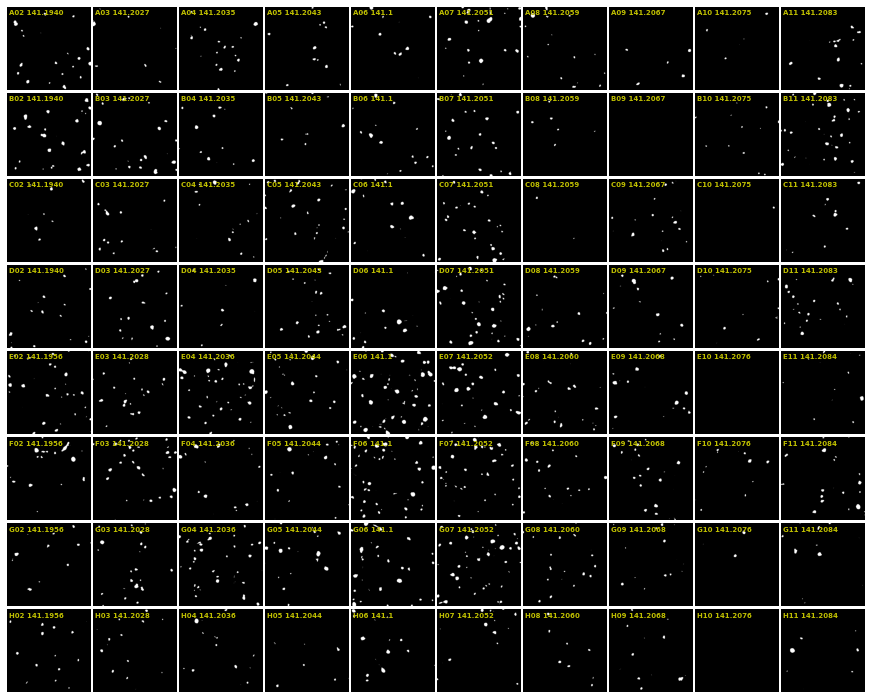

20230522_wHaloCaMP_raw P06a-20230508_wHaloCaMP
A02
A03
A04
A05
A06
A07
A08
A09
A10
A11
B02
B03
B04
B05
B06
B07
B08
B09
B10
B11
C02
C03
C04
C05
C06
C07
C08
C09
C10
C11
D02
D03
D04
D05
D06
D07
D08
D09
D10
D11
E02
E03
E04
E05
E06
E07
E08
E09
E10
E11
F02
F03
F04
F05
F06
F07
F08
F09
F10
F11
G02
G03
G04
G05
G06
G07
G08
G09
G10
G11
H02
H03
H04
H05
H06
H07
H08
H09
H10
H11


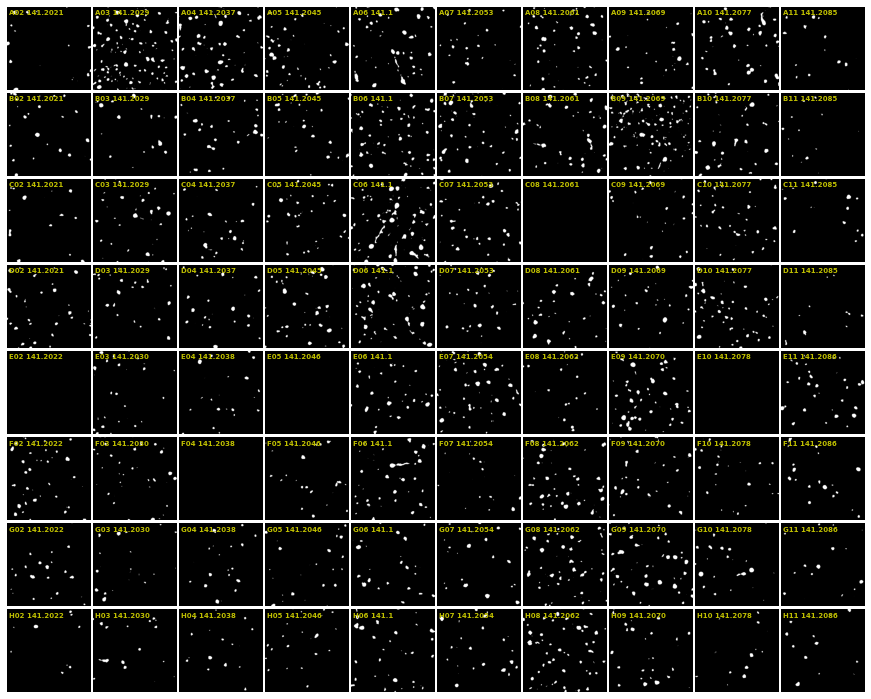

20230522_wHaloCaMP_raw P07a-20230508_wHaloCaMP
A02
A03
A04
A05
A06
A07
A08
A09
A10
A11
B02
B03
B04
B05
B06
B07
B08
B09
B10
B11
C02
C03
C04
C05
C06
C07
C08
C09
C10
C11
D02
D03
D04
D05
D06
D07
D08
D09
D10
D11
E02
E03
E04
E05
E06
E07
E08
E09
E10
E11
F02
F03
F04
F05
F06
F07
F08
F09
F10
F11
G02
G03
G04
G05
G06
G07
G08
G09
G10
G11
H02
H03
H04
H05
H06
H07
H08
H09
H10
H11


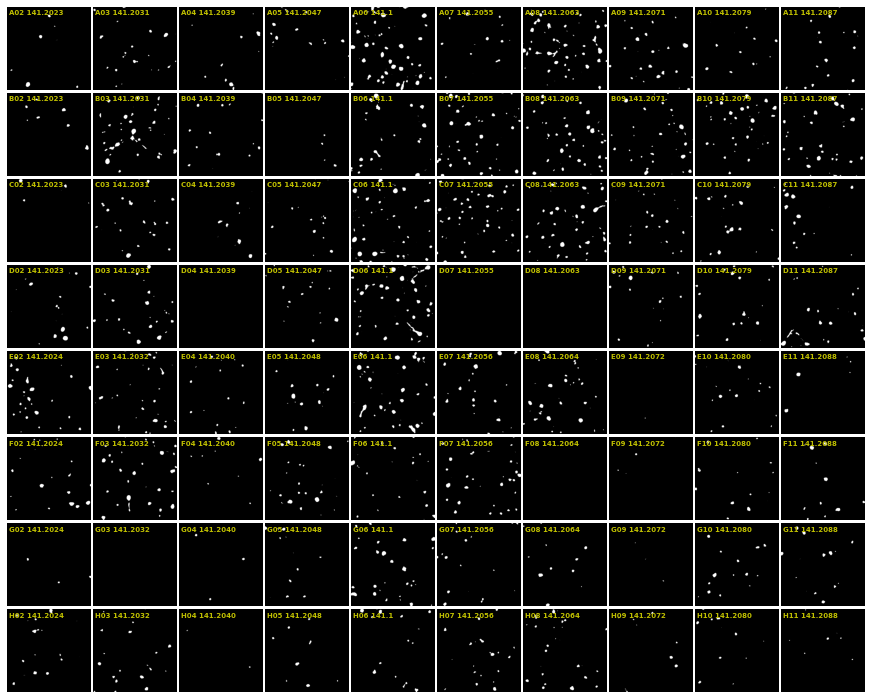

20230522_wHaloCaMP_raw P08a-20230508_wHaloCaMP
A02
A03
A04
A05
A06
A07
A09
A10
A11
B02
B03
B04
B05
B06
B07
B09
B10
B11
C02
C03
C04
C05
C06
C07
C09
C10
C11
D02
D03
D04
D05
D06
D07
D09
D10
D11
E02
E03
E04
E05
E06
E07
E08
E09
E10
E11
F02
F03
F04
F05
F06
F07
F08
F09
F10
F11
G02
G03
G04
G05
G06
G07
G08
G09
G10
G11
H02
H03
H04
H05
H06
H07
H08
H09
H10
H11


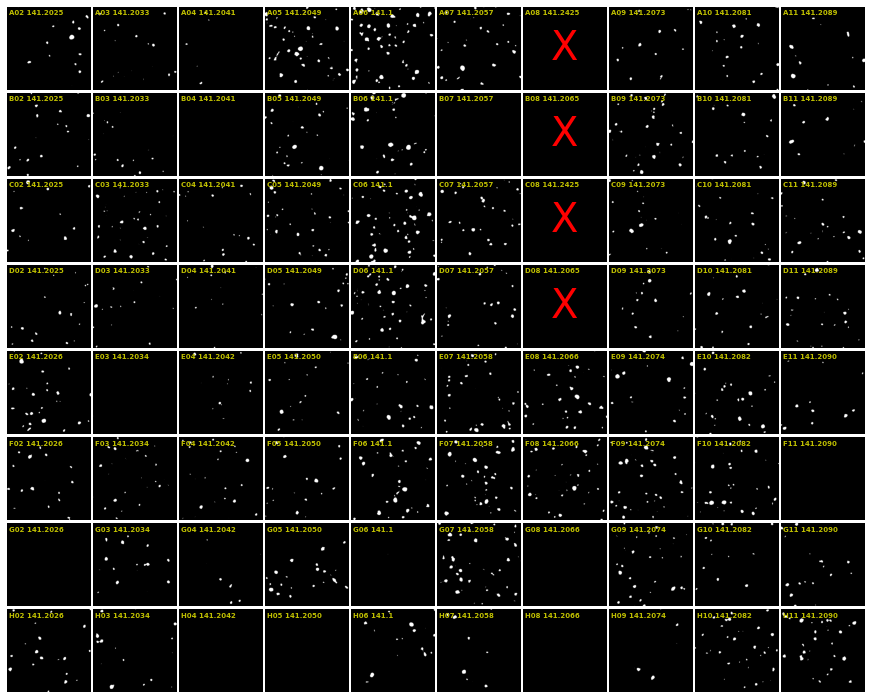

20230522_wHaloCaMP_raw P09a-20230508_wHaloCaMP
A02
A03
A04
A05
A06
A07
B02
B03
B04
B05
B06
B07
C02
C03
C04
C05
C06
C07
D02
D03
D04
D05
D06
D07
E02
E03
E04
E05
E06
E07
F02
F03
F04
F05
F06
F07
G02
G03
G04
G05
G06
G07
H02
H03
H04
H05
H06
H07


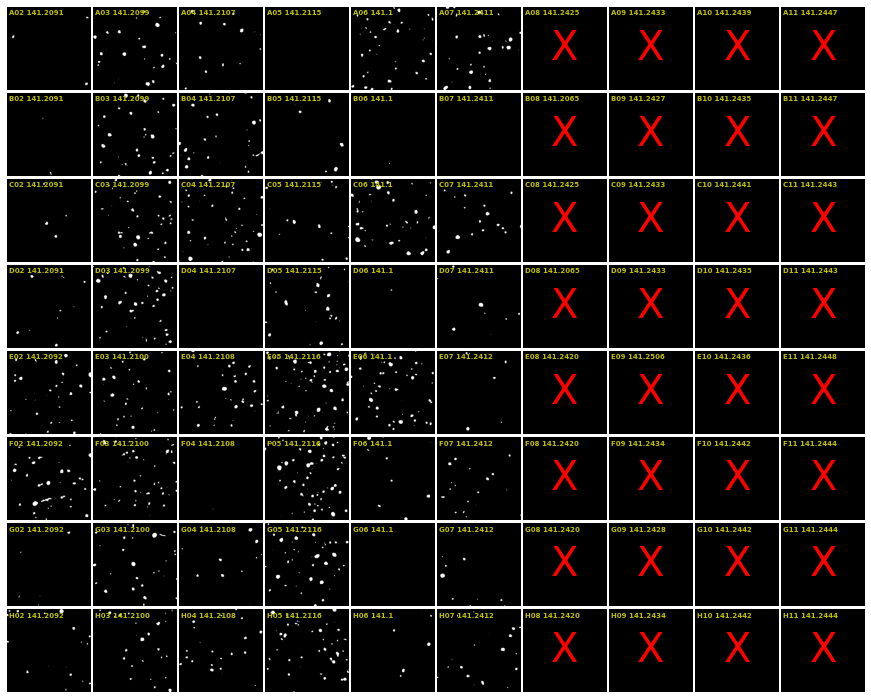

20230522_wHaloCaMP_raw P10a-20230508_wHaloCaMP
A02
A03
A04
A05
A06
A07
A08
A09
A10
A11
B02
B03
B04
B05
B06
B07
B08
B09
B10
B11
C02
C03
C04
C05
C06
C07
C08
C09
C10
C11
D02
D03
D04
D05
D06
D07
D08
D09
D10
D11
E02
E03
E04
E05
E06
E07
E08
E09
E10
E11
F02
F03
F04
F05
F06
F07
F08
F09
F10
F11
G02
G03
G04
G05
G06
G07
G08
G09
G10
G11
H02
H03
H04
H05
H06
H07
H08
H09
H10
H11


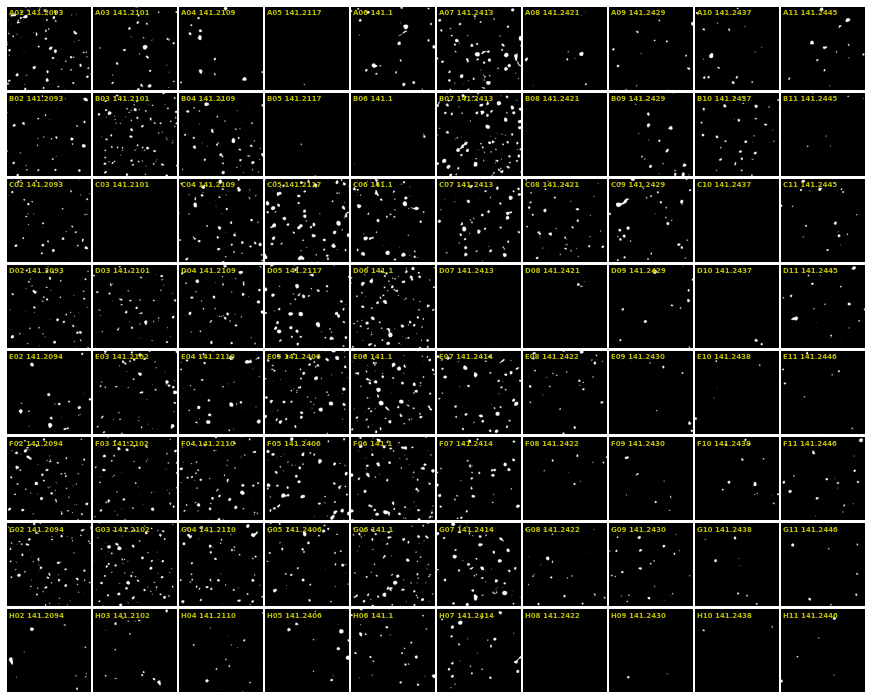

20230522_wHaloCaMP_raw P11a-20230508_wHaloCaMP
A02
A03
A04
A05
A06
A07
A08
A09
B02
B03
B04
B05
B06
B07
B08
B09
C02
C03
C04
C05
C06
C07
C08
C09
D02
D03
D04
D05
D06
D07
D08
D09
E02
E03
E04
E05
E06
E07
E08
E09
F02
F03
F04
F05
F06
F07
F08
F09
G02
G03
G04
G05
G06
G07
G08
G09
H02
H03
H04
H05
H06
H07
H08
H09


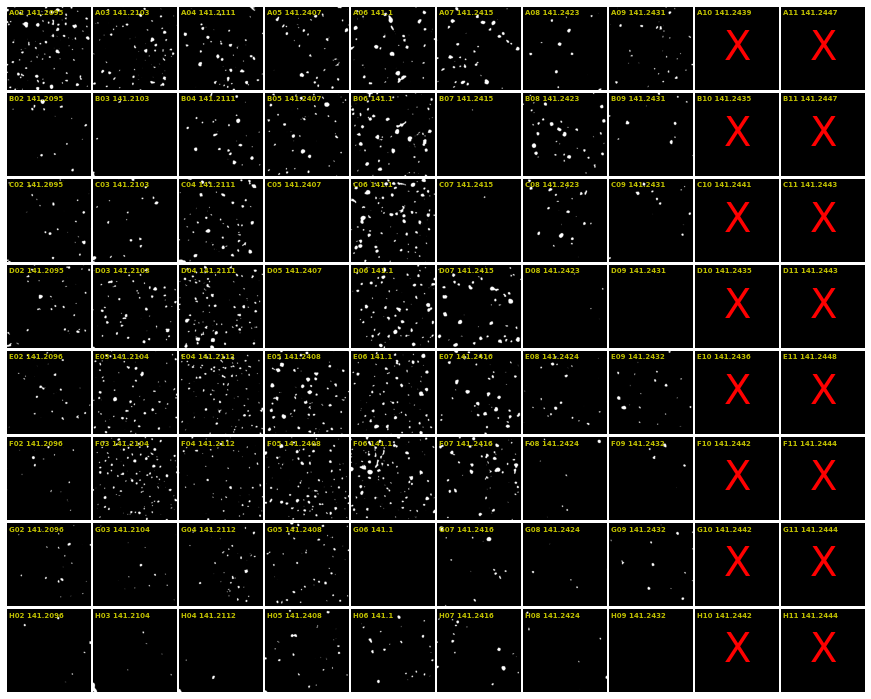

20230522_wHaloCaMP_raw P12a-20230508_wHaloCaMP
A02
A03
A04
A05
A06
A07
A11
B02
B03
B04
B05
B06
B07
B11
C02
C03
C04
C05
C06
C07
C11
D02
D03
D04
D05
D06
D07
D11
E02
E03
E04
E05
E06
E07
E08
E11
F02
F03
F04
F05
F06
F07
F08
F11
G02
G03
G04
G05
G06
G07
G08
G11
H02
H03
H04
H05
H06
H07
H08
H11


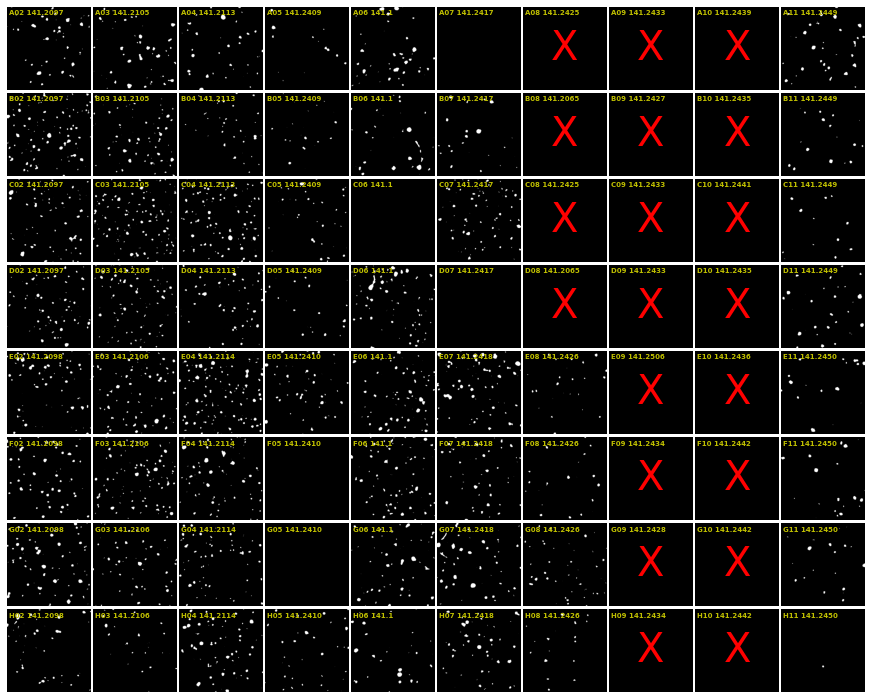

20230522_wHaloCaMP_raw P13a-20230508_wHaloCaMP
A02
A03
A04
A06
A07
A08
A09
A10
A11
B02
B03
B04
B06
B07
B08
B09
B10
B11
C02
C03
C04
C06
C07
C08
C09
C10
C11
D02
D03
D04
D06
D07
D08
D09
D10
D11
E02
E03
E04
E05
E06
E07
E08
E09
E10
E11
F02
F03
F04
F05
F06
F07
F08
F09
F10
F11
G02
G03
G04
G05
G06
G07
G08
G09
G10
G11
H02
H03
H04
H05
H06
H07
H08
H09
H10
H11


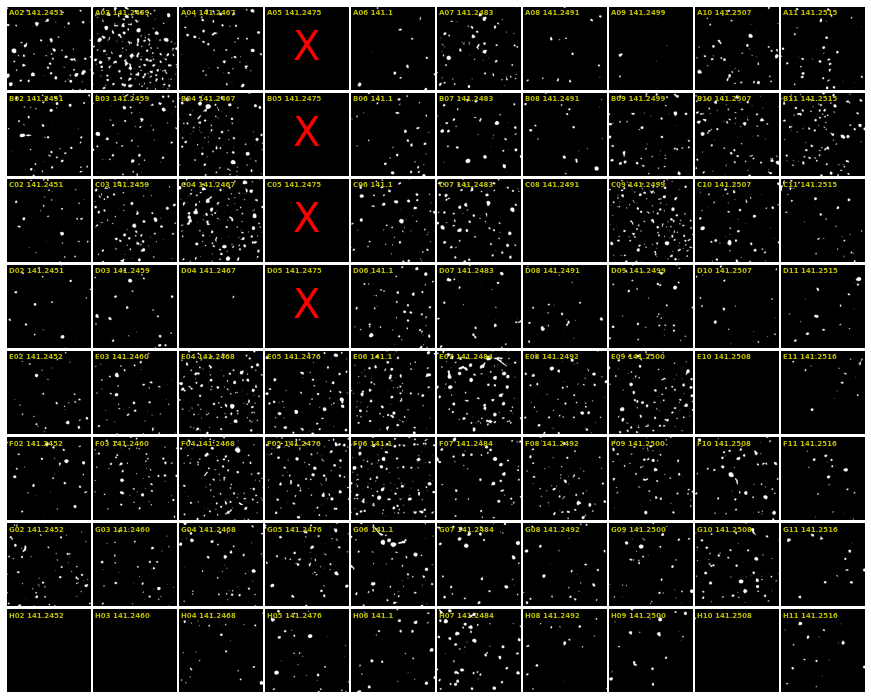

20230522_wHaloCaMP_raw P14a-20230508_wHaloCaMP
A02
A03
A04
A05
A06
A07
A08
A09
A10
A11
B02
B03
B04
B05
B06
B07
B08
B09
B10
B11
C02
C03
C04
C05
C06
C07
C08
C09
C10
C11
D02
D03
D04
D05
D06
D07
D08
D09
D10
D11
E02
E03
E04
E05
E06
E07
E08
E09
E10
E11
F02
F03
F04
F05
F06
F07
F08
F09
F10
F11
G02
G03
G04
G05
G06
G07
G08
G09
G10
G11
H02
H03
H04
H05
H06
H07
H08
H09
H10
H11


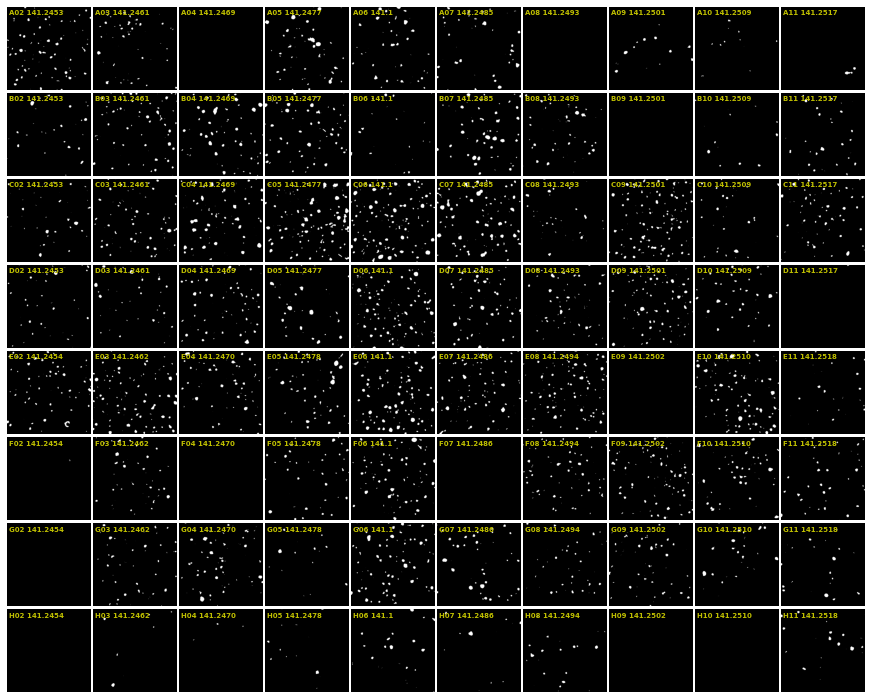

20230522_wHaloCaMP_raw P15a-20230508_wHaloCaMP
A02
A03
A04
A05
A06
A07
A08
A09
A10
A11
B02
B03
B04
B05
B06
B07
B08
B09
B10
B11
C02
C03
C04
C05
C06
C07
C08
C09
C10
C11
D02
D03
D04
D05
D06
D07
D08
D09
D10
D11
E02
E03
E04
E05
E06
E07
E08
E09
E10
E11
F02
F03
F04
F05
F06
F07
F08
F09
F10
F11
G02
G03
G04
G05
G06
G07
G08
G09
G10
G11
H02
H03
H04
H05
H06
H07
H08
H09
H10
H11


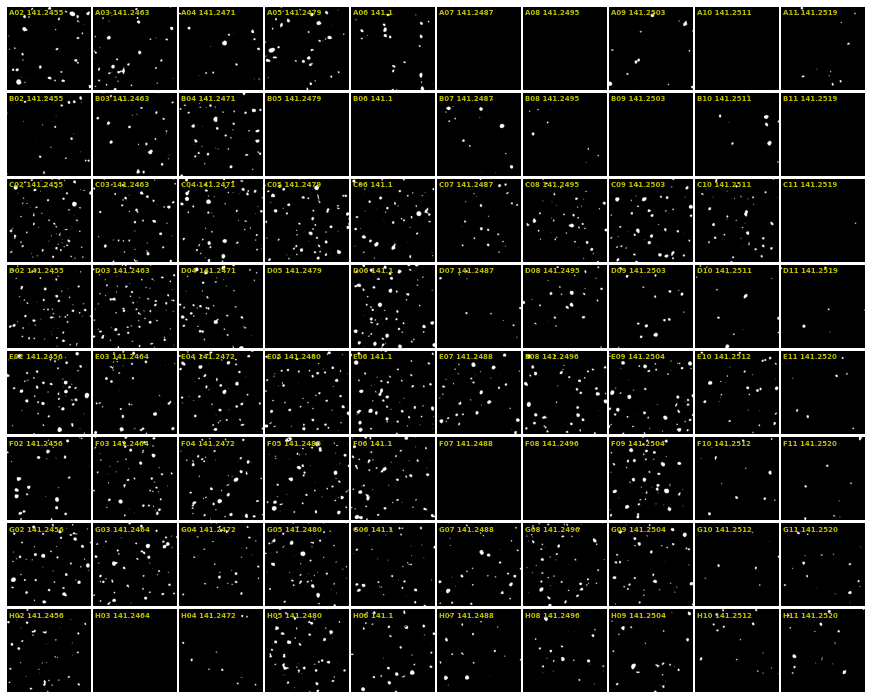

20230522_wHaloCaMP_raw P16a-20230508_wHaloCaMP
A04
A05
A06
A07
A08
A09
A10
A11
B04
B05
B06
B07
B08
B09
B10
B11
C04
C05
C06
C07
C08
C09
C10
C11
D04
D05
D06
D07
D08
D09
D10
D11
E02
E03
E04
E05
E06
E07
E08
E11
F02
F03
F04
F05
F06
F07
F08
F11
G02
G03
G04
G05
G06
G07
G08
G11
H02
H03
H04
H05
H06
H07
H08
H11


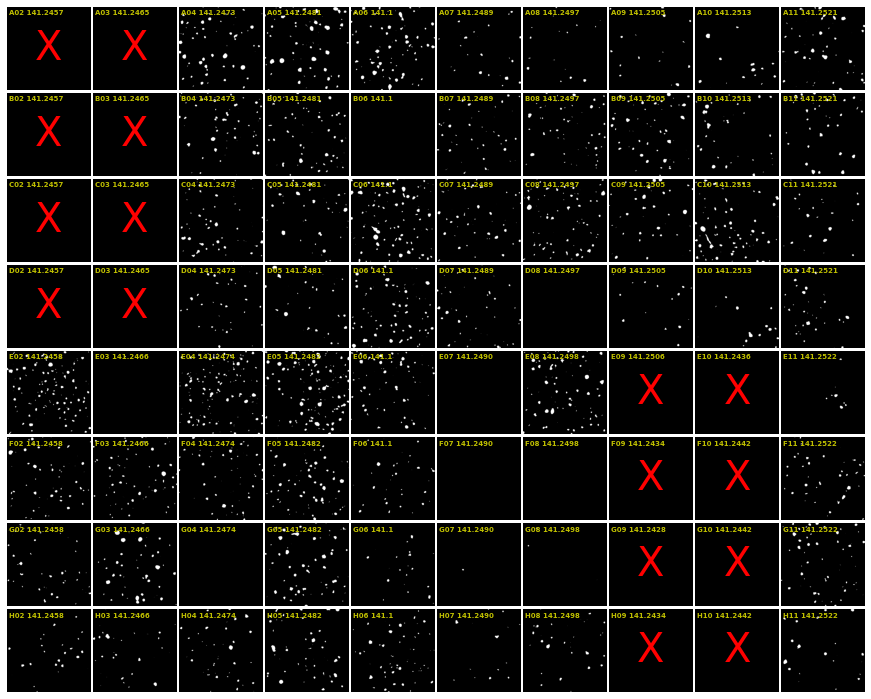

In [8]:
Date = []
Plate = []
Well = []
Construct = []
Stim = []

dFF = []
F0 = []
dFF_peak = []
T_peak = []
Half_rise = []
Half_decay = []

ImageTime = []
VPulseTime = []
nVPulse = []

badWells = {}
for plate in plates:
    print(date, plate)
    wells = [w for w in os.listdir(os.path.join(imgPath,date,plate,'imaging')) if 'Well' in w]
    wells = sorted(wells)
    plt.figure(figsize=[12,9.6])
    h5Files = glob(os.path.join(imgPath,date,plate)+'\\*.h5')
    h5File = h5Files[0]
    
    data_as_dict = ws.loadDataFile(filename=h5File, format_string='double')
    fs = data_as_dict['header']['AcquisitionSampleRate'][0][0]

    i=1
    badWell = []
    
    
    for w_ab in Wells:
        ax = plt.subplot(8,10,i)
        w = glob(os.path.join(imgPath,date,plate,'imaging')+'\\*'+w_ab)
        if len(w)==0:      
            try:
                img = glob(os.path.join(imgPath,date,'doNotAnalyze')+'\\*%s*001FP*.tif' %w_ab)[0]
                c = os.path.basename(img).split('_')[2].replace('dot','.')
                w = os.path.basename(img).split('_')[1].split('-')[1]
                ax.imshow(np.zeros([512,512]),cmap='gray')
                ax.text(10,50,w+' '+c,color='y',weight='bold',size=7)
                ax.text(256,256,'X',color='r',size=40,ha='center',va='center')
            except:
                print(w_ab + ' data unavailable')
                w = w_ab
                ax.imshow(np.zeros([512,512]),cmap='gray')
                ax.text(10,50,w,color='y',weight='bold',size=7)
                ax.text(256,256,'X',color='r',size=40,ha='center',va='center')
            
        else:
            w = w[0]
            seg = os.path.join(w,'Segment')+'\\ilastik_segmentation.h5'
            seg = h5py.File(seg,'r')
            seg = seg['exported_data'][()]
            seg = np.squeeze(seg)
            img = glob(w+'\\*001FP*.tif')[0]
            c = os.path.basename(img).split('_')[2].replace('dot','.')
            ax.imshow(seg*-1+2,cmap='gray')
            ax.text(10,50,w[-3:]+' '+c,color='y',weight='bold',size=7)
            print(w[-3:])
            
            seg = seg*-1+2
            seg = downscale_local_mean(seg,(4,4))
            seg = seg==1

            DAQ_Andor = []
            DAQ_stim = []

            stimImg = glob(w+'\\*_sweep_*.tif')
            if len(stimImg) < 4:
                badWell.append(w)
                print('badWell', w)
                i+=1
                continue

            for stim in ['001FP','003FP','010FP','160FP']:
                img = glob(w+'\\*%s*' %stim)[0]
                img_arr = imread(img)
                c = seg*img_arr
                d = np.sum(c,axis=1)
                F = np.sum(d,axis=1)/np.sum(seg)
                f0 = np.mean(F[2:7])
                fb = np.min(img_arr)
                dff = (np.array(F)-f0)/(f0-fb)

                Date.append(date)
                Plate.append(plate)
                Well.append(w[-3:])

                Construct.append(os.path.basename(img).split('_')[2])

                Stim.append(stim)
                dFF.append(dff)
                F0.append(f0)

                sweep_no = os.path.basename(img).split('_')[-1][:-4]  # Find the corresponding sweep no. in h5 file
                k = 'sweep_'+ sweep_no.zfill(4)

                currentSweep = data_as_dict[k]
                andorSync = currentSweep['analogScans'][1] # 1 for wHaloCaMP screening
                voltage = currentSweep['analogScans'][0] 
                positive = np.diff((andorSync>1.5)*1)>0
                timestamp = np.where(positive)[0]
                imageTime = timestamp/fs

                vmax=np.max(voltage)
                vmin = np.min(voltage)
                if np.abs(vmin) > vmax:
                    voltage = -1.*voltage
                    vmax = np.abs(vmin)
                vbase = np.median(voltage)
                threshold = (vmax-vbase)/2
                positive = np.diff((voltage>threshold)*1)>0
                timestamp = np.where(positive)[0]
                vPulseTime = timestamp/fs

                stim_start_idx = np.argmin(np.abs(imageTime-vPulseTime[0]))
                trace = dff[stim_start_idx:]
                dff_peak = np.max(trace)
                dFF_peak.append(dff_peak)
                half_peak = dff_peak/2.0
                t_peak_idx = np.argmin(np.abs(trace - dff_peak))

                try:
                    t_peak = imageTime[stim_start_idx+t_peak_idx] - imageTime[stim_start_idx]
                    T_peak.append(t_peak)
                except:
                    T_peak.append(np.nan)

                try:
                    rise_trace = trace[:t_peak_idx]
                    half_rise_idx = np.argmin(np.abs(rise_trace-half_peak))
                    half_rise = imageTime[stim_start_idx+half_rise_idx]-imageTime[stim_start_idx]
                    Half_rise.append(half_rise)
                except:
                    Half_rise.append(np.nan)

                try:
                    decay_trace = trace[t_peak_idx:]
                    half_decay_idx = np.argmin(np.abs(decay_trace-half_peak))
                    half_decay = imageTime[stim_start_idx+t_peak_idx+half_decay_idx]-imageTime[stim_start_idx+t_peak_idx]
                    Half_decay.append(half_decay)
                except:
                    Half_decay.append(np.nan)

                ImageTime.append(imageTime)
                VPulseTime.append(vPulseTime)
                nVPulse.append(timestamp.shape[0])

                DAQ_Andor.append(andorSync)
                DAQ_stim.append(voltage)

            
            daqPath = w
            if not os.path.exists(daqPath):
                os.mkdir(daqPath)
            np.save(daqPath+'\\Andor_signal.npy',DAQ_Andor)
            np.save(daqPath+'\\Stim_signal.npy',DAQ_stim)

            badWells[plate] = badWell
        ax.axis('off')
        i+=1
    plt.tight_layout(pad=0.3)
    plt.savefig(savePath+'\\segmentation_%s.svg' %plate.split('_')[0],format='svg')
    plt.show()
    plt.close()

- Create dataframe for new session

In [9]:
df_new = pd.DataFrame()

In [10]:
df_new['Date'] = Date
df_new['Plate'] = Plate
df_new['Well'] = Well
df_new['Construct'] = Construct
df_new['Stim'] = Stim
df_new['DFF'] = dFF

df_new['F0'] = F0
df_new['dFF_peak'] = dFF_peak
df_new['T_peak'] = T_peak
df_new['Half_rise'] = Half_rise
df_new['Half_decay'] = Half_decay

df_new['ImageTime'] = ImageTime
df_new['VPulseTime'] = VPulseTime
df_new['nVPulse'] = nVPulse

### Filter info: added starting for 220502 data
df_new['Filter'] = 'EX 660/13, DM 677, EM 719/60'
df_new['Power at specimen level (mW)'] = 2.16
df_new['Controller intensity setting'] = '100 (unitless)'


In [11]:
# df_new.columns
# df_new.shape
# df_new.head()

- Assign curated wells

In [12]:
# bad_wells = {
#     'P02a-20211115_wHaloCaMP-669':['A06','B06','C06','D06','H07'],
#     'P03a-20211115_wHaloCaMP-673':['A06','D08','D09','G05'],
#     'P04a-20211115_wHaloCaMP-673':['A07','F06']
# }

# bad_wells = {
#     'P01a-20220221_wHaloCaMP':['A03','A04','A05','A06','A07','A08','A09','A10',
#                                   'B03','B05','B06','B07',
#                                   'C06','C07',
#                                   'D06','D07',
#                                   'E03','E06','E07',
#                                   'F03','F05','F06','F07','F09',
#                                   'G03','G04','G06','G07','G09',
#                                   'H03','H06','H07']
# }

# bad_wells = {
#     'P01a-20220228_wHaloCaMP-669':['A07','B07','F07','H07']
# }

# bad_wells = {
#     'P01a-20220314_wHaloCaMP-673':['B06','B07','E07','F07','G07','H07']
# }

# bad_wells = {
#     'P04a-20220418_wHaloCaMP':[]
# }

# 20220516 data
# bad_wells = {
#     'P04a-20220504_wHaloCaMP':['A02','A03','A07','A10','B02','B10','B11','C04','C05','C10','C11','D02','D03','D04','D10',
#                                'D11','E02','E05','E08','E09','E10','E11','F04','F05','G08','G10','G11','H02','H08','H11'],
#     'P05a-20220504_wHaloCaMP':[],
#     'P06a-20220504_wHaloCaMP':['B05','B07','F05'],
#     'P07a-20220504_wHaloCaMP':[],
#     'P08a-20220504_wHaloCaMP':[],
#     'P09a-20220504_wHaloCaMP':['A10','A11','B10','C10','D10'],
#     'P10a-20220504_wHaloCaMP':['A06','A09','B06','B09','C06','C09','D06','D09','E05','F05','G05','H05'],
#     'P11a-20220504_wHaloCaMP':['E08','F08','G08','H08'],
#     'P12a-20220504_wHaloCaMP':['A03','A04','B03','B04','C03','C04','D03','D04','E02','E09','F02','F09','G02','G09','G11',
#                                'H02','H09'],
#     'P13a-20220504_wHaloCaMP':['E03','F03','G03','H03'],
#     'P14a-20220504_wHaloCaMP':['A07','B07','E08','F08','G08','H08'],
#     'P15a-20220504_wHaloCaMP':['A02','A03','B02','B09','C02','D02','D09','E09','F05','F09','F10','G05','G09','H05','H09'],
#     'P16a-20220504_wHaloCaMP':[''],
#     'P17a-20220504_wHaloCaMP':['A03','A04','B04','C04','D04'],
#     'P18a-20220504_wHaloCaMP':['B10','D02'],
#     'P19a-20220504_wHaloCaMP':[],
#     'P20a-20220504_wHaloCaMP':['A11','B11','C11','D11','E02','E11','F02','F11','G02','G11','H02','H11']
# }

# # 20220523 data
# bad_wells = {'P04a-20220509_wHaloCaMP': ['A05', 'B05', 'C05', 'D05', 'E05', 'F05', 'G05', 'H05'],
#              'P05a-20220509_wHaloCaMP': [],
#              'P06a-20220509_wHaloCaMP': ['E10', 'F10', 'G10', 'H10'],
#              'P07a-20220509_wHaloCaMP': ['H03'],
#              'P08a-20220509_wHaloCaMP': ['E03', 'F03', 'G03', 'H03', 'A10', 'B10', 'C10', 'D10', 'A11', 'B11', 'C11', 'D11', 'E11', 'F11', 'G11', 'H11'],
#              'P09a-20220509_wHaloCaMP': ['E02', 'F02', 'G02', 'H02', 'H03'],
#              'P10a-20220509_wHaloCaMP': ['A02', 'B02', 'C02', 'D02', 'A04', 'B04', 'C04', 'D04', 'A08', 'B08', 'C08', 'D08', 'E08', 'F08', 'G08', 'H08', 'E10', 'F10', 'G10', 'H10'],
#              'P11a-20220509_wHaloCaMP': ['A02', 'B02', 'C02', 'D02', 'A07', 'B07', 'C07', 'D07'],
#              'P12a-20220509_wHaloCaMP': ['H02', 'A05', 'B05', 'C05', 'D05'],
#              'P13a-20220509_wHaloCaMP': ['A07', 'B07', 'C07', 'D07', 'A08', 'B08', 'C08', 'D08', 'A09', 'B09', 'C09', 'D09'],
#              'P14a-20220509_wHaloCaMP': ['A04', 'H03', 'A07', 'B07', 'C07', 'D07'],
#              'P15a-20220509_wHaloCaMP': ['A02', 'B02', 'C02', 'D02'],
#              'P16a-20220509_wHaloCaMP': ['H03', 'F04', 'E05', 'F05', 'G05', 'H05', 'E10', 'F10', 'G10', 'H10'],
#              'P17a-20220509_wHaloCaMP': ['E02', 'F02', 'G02', 'H02', 'D09'],
#              'P18a-20220509_wHaloCaMP': ['E05', 'F05', 'G05', 'H05'],
#              'P19a-20220509_wHaloCaMP': [],
#              'P20a-20220509_wHaloCaMP': ['H03', 'H05', 'E09', 'F09', 'G09', 'H09', 'A11', 'B11', 'C11', 'D11', 'E11', 'F11', 'G11', 'H11']
#             }

# # 20220530 data
# bad_wells = {'P01a-20220516_wHaloCaMP': ['D06','D11'],
#              'P02a-20220516_wHaloCaMP': ['H04'],
#              'P03a-20220516_wHaloCaMP': ['F04'],
#              'P04a-20220516_wHaloCaMP': ['F04','E07','F07','G07','H07'],
#              'P05a-20220516_wHaloCaMP': ['F03','F04'],
#              'P06a-20220516_wHaloCaMP': ['F04'],
#              'P07a-20220516_wHaloCaMP': ['A02','B02','C02','D02','E02','E04','F04','G04','E05','F05','G05','H05','E06','E07','F07','G07','H07','E08','F08','G08','H08','E10','F10','G10'],
#              'P09a-20220516_wHaloCaMP': ['A02','B02','C02','D02','E02','F02','G02','H02','E03','F03','G03','H03','E04','F04','E05','G05','H05','F06','B07','G08','D09','F11','G11'],
#              'P10a-20220516_wHaloCaMP': ['A08','B08','C08','D08','A09', 'B09', 'C09', 'D09'],
#              'P11a-20220516_wHaloCaMP': ['E03','F03','G03','H03','F04','H04','F05','A09','B09'],
#              'P12a-20220516_wHaloCaMP': ['A03','F04','C05','A07'],
#              'P13a-20220516_wHaloCaMP': ['F04','E05','D07','D08','E08'],
#              'P14a-20220516_wHaloCaMP': ['E09','F09','G09','H09'],
#              'P15a-20220516_wHaloCaMP': ['D04','F04','H04','A09','B09','C09','D09'],
#              'P16a-20220516_wHaloCaMP': ['C02','H02','C06','H08','E09','F09','G09','H09']
#             }

# # 20220614 data
# bad_wells = {'P01a-20220523_wHaloCaMP': ['E08', 'F08', 'G08', 'H08', 'A10', 'B10', 'C10', 'D10'],
#          'P02a-20220523_wHaloCaMP': [],
#          'P03a-20220523_wHaloCaMP': ['A03', 'B03', 'C03', 'D03', 'A04', 'B04', 'C04', 'D04'],
#          'P04a-20220523_wHaloCaMP': ['E03', 'F03', 'G03', 'H03'],
#          'P05a-20220523_wHaloCaMP': [],
#          'P06a-20220523_wHaloCaMP': [],
#          'P07a-20220523_wHaloCaMP': ['H02', 'A08', 'B08', 'C08', 'D08'],
#          'P08a-20220523_wHaloCaMP': ['A10', 'B10', 'C10', 'D10'],
#          'P09a-20220523_wHaloCaMP': [],
#          'P10a-20220523_wHaloCaMP': ['C11'],
#          'P11a-20220523_wHaloCaMP': ['A11'],
#          'P12a-20220523_wHaloCaMP': ['H02','A09'],
#          'P13a-20220523_wHaloCaMP': [],
#          'P14a-20220523_wHaloCaMP': ['A09', 'B09', 'C09', 'D09', 'D10'],
#          'P15a-20220523_wHaloCaMP': ['A03', 'B03', 'C03', 'D03', 'A09', 'B09', 'C09', 'D09'],
#          'P16a-20220523_wHaloCaMP': []}

# # 20220614 data
# bad_wells = {'P01a-20220530_wHaloCaMP': ['E03', 'F03', 'G03', 'H03', 'H07'],
#              'P02a-20220530_wHaloCaMP': ['E03', 'F03', 'G03', 'H03'],
#              'P03a-20220530_wHaloCaMP': ['C02', 'E02', 'G02', 'A05', 'B05', 'C05', 'D05', 'H07'],
#              'P04a-20220530_wHaloCaMP': ['G02', 'D03'],
#              'P05a-20220530_wHaloCaMP': ['E10'],
#              'P06a-20220530_wHaloCaMP': ['D04', 'E04', 'F04', 'G04', 'H04', 'A09', 'B09', 'C09', 'D09'],
#              'P07a-20220530_wHaloCaMP': ['E02', 'F02', 'G02', 'H02'],
#              'P08a-20220530_wHaloCaMP': ['E02', 'G02'],
#              'P09a-20220530_wHaloCaMP': ['G02', 'A08', 'B08', 'C08', 'D08', 'E10', 'F10', 'G10', 'H10'],
#              'P10a-20220530_wHaloCaMP': [],
#              'P11a-20220530_wHaloCaMP': ['A03', 'B03', 'C03', 'D03', 'D04'],
#              'P12a-20220530_wHaloCaMP': [],
#              'P13a-20220530_wHaloCaMP': ['A02', 'B02', 'C02', 'D02', 'G02', 'H07', 'H09'],
#              'P14a-20220530_wHaloCaMP': ['E09'],
#              'P15a-20220530_wHaloCaMP': ['A05', 'B05', 'C05', 'D05', 'E05', 'F05', 'G05', 'H05', 'A07', 'H07'],
#              'P16a-20220530_wHaloCaMP': ['G02', 'E11', 'F11', 'G11', 'H11']
#             }

# # 20220621 data
# bad_wells = {'P01a-20220606_wHaloCaMP': ['E05', 'F05', 'G05', 'H05', 'A08', 'B08', 'C08', 'D08', 'E10', 'F10', 'E11', 'F11', 'G11', 'H11'],
#              'P02a-20220606_wHaloCaMP': ['A02', 'H02', 'A05', 'B05', 'H10'],
#              'P03a-20220606_wHaloCaMP': ['G04', 'A11', 'B11', 'C11', 'D11', 'E11', 'F11', 'G11', 'H11'],
#              'P04a-20220606_wHaloCaMP': ['C02', 'D02', 'H04', 'H05', 'G06', 'A11', 'B11', 'C11', 'D11', 'E11', 'F11', 'G11', 'H11'],
#              'P05a-20220606_wHaloCaMP': ['B02', 'E02', 'A04', 'B04', 'C04', 'D04', 'D05',  'B10', 'C10', 'D10', 'E10', 'F10', 'G10', 'H10', 'A11', 'B11', 'C11', 'D11', 'E11', 'F11', 'G11', 'H11'],
#              'P06a-20220606_wHaloCaMP': ['C04', 'A11', 'B11', 'C11', 'D11', 'E11', 'F11', 'G11', 'H11'],
#              'P07a-20220606_wHaloCaMP': ['B02', 'A05', 'B05', 'C05', 'D05', 'A07', 'B07', 'C07', 'D07', 'F08', 'G08', 'H08', 'F11', 'G11', 'H11'],
#              'P08a-20220606_wHaloCaMP': ['E04', 'F04', 'G04', 'H04', 'A05', 'E08', 'F08', 'G08', 'H08', 'H10', 'A11', 'B11', 'C11', 'D11', 'E11', 'F11', 'G11', 'H11']
#             }

# # 20220627 data
# bad_wells = {'P05a-20220613_wHaloCaMP': ['E02','A05','B05','C05','H05','A10','B10','E10','F10','G10','H10','A11','B11','C11','E11','F11','G11','H11'],
#              'P06a-20220613_wHaloCaMP': ['E08','F08','G08','H08','A11','B11','C11','F11','G11','H11'],
#              'P07a-20220613_wHaloCaMP': ['A11','H11'],
#              'P08a-20220613_wHaloCaMP': ['A10','F10','G10','A11','B11','C11','D11','E11','F11','G11','H11'],
#              'P09a-20220613_wHaloCaMP': ['A02','B02','C02','F02','G02','H04','E05','H05','E09','F09','G09','H09','A10','B10','C10','D10','E10','F10','G10','H10','B11','G11','H11'],
#              'P10a-20220613_wHaloCaMP': ['B02','H02','E08','F08','G08','H08','E09','F09','G09','H09','A10','B10','C10','D10','E10','F10','G10','H10'],
#              'P11a-20220613_wHaloCaMP': ['A02','B02','C02','D02','G02','A09','B09','C09','D09','E09','F09','G09','H09','A10','B10','C10','D10','A11'],
#              'P12a-20220613_wHaloCaMP': ['E02','F02','G02','H02','A03','B03','C03','D03','A08','B08','C08','D08','E09','F09','G09','H09'],
#              'P13a-20220613_wHaloCaMP': ['A02','B02','C02','D02','E02','F02','G02','H02','A05','B05','C05','D05','A09','B09','C09','D09','E09','F09','G09','H09','A10','B10','C10','D10','E10','F10','G10','H10','A11','B11','C11','D11','E11','F11','G11','H11'],
#              'P14a-20220613_wHaloCaMP': ['G02','H02','E03','F03','G03','H03','E07','F07','G07','H07'],
#              'P15a-20220613_wHaloCaMP': ['G02','D09','G10','G11'],
#              'P16a-20220613_wHaloCaMP': ['H03','E05','F05','G05','H05','A07','B07','C07','H07','D10','G10','H10','A11','B11','C11','D11','G11','H11'],
#              'P17a-20220613_wHaloCaMP': ['E02','H02','H03','D10','H11'],
#              'P18a-20220613_wHaloCaMP': ['A02','B02','D02','A03','B03','C03','H03','A04','B04','C04','G04','A05','B05','C05','D05','E05','E07'],
#              'P19a-20220613_wHaloCaMP': ['A02','E02','A05','E05','F05','G05','H05','A07','B07','C07','D07','A11','B11','C11','D11','E11','F11','G11','H11'],
#              'P20a-20220613_wHaloCaMP': ['A02','C07','A08','B08','C08','D08','E08','F08','G08','H08','G10','A11','B11','C11','D11','E11','F11','G11','H11']
#             }

# # 20220701 data (mScarlet)
# bad_wells = {
#     'P03a-20220613_mScarlet':['A06','A08','B03','C03','C05','C08','D03','D04','E03','E04','F03','F06','F08','G03','H05'],
#     'P04a-20220613_mScarlet':['A03','A05','B03','C06','E03','E04','F03','F07','F08','G03','G06','H08']
# }

# # 20220704 data
# bad_wells = {
# 'P01a-20220620_wHaloCaMP': ['A03', 'B03', 'C03', 'D03', 'B04'],
# 'P02a-20220620_wHaloCaMP': ['A09', 'B09', 'C09', 'D09', 'G03'],
# 'P03a-20220620_wHaloCaMP': ['E02', 'F02', 'G02', 'H02', 'G03', 'E07', 'H07'],
# 'P04a-20220620_wHaloCaMP': ['A04', 'B04', 'C04', 'D04', 'B05', 'E05', 'F05', 'G05', 'H05', 'D09'],
# 'P05a-20220620_wHaloCaMP': ['E05', 'F05', 'G05', 'H05', 'A09', 'B09', 'C09', 'D09'],
# 'P06a-20220620_wHaloCaMP': ['G03'],
# 'P07a-20220620_wHaloCaMP': ['E02', 'F02', 'G02', 'H02', 'G03', 'E05', 'F05', 'G05', 'H05'],
# 'P08a-20220620_wHaloCaMP': ['G03', 'E04', 'F04', 'G04', 'H04', 'A05', 'B05', 'C05', 'D05'],
# 'P09a-20220620_wHaloCaMP': ['E03', 'F03', 'G03', 'H03'],
# 'P10a-20220620_wHaloCaMP': ['A07', 'B07', 'C07', 'D07', 'A11', 'B11', 'C11', 'D11'],
# 'P11a-20220620_wHaloCaMP': ['A02', 'E02', 'F02', 'G02', 'H02', 'F03', 'G03', 'A04', 'B04', 'C04', 'D04', 'H04', 'C05', 'F05', 'H09', 'F10', 'G10', 'G11', 'H11'],
# 'P12a-20220620_wHaloCaMP': ['G03', 'B05', 'H06', 'E11', 'F11', 'G11', 'H11'],
# 'P13a-20220620_wHaloCaMP': ['A03', 'B03', 'C03', 'D03', 'E03', 'F03', 'G03', 'H03', 'E05', 'F05', 'A07', 'B07', 'C07', 'D07'],
# 'P14a-20220620_wHaloCaMP': ['A09', 'B09', 'C09', 'D09', 'B10', 'B11'],
# 'P15a-20220620_wHaloCaMP': ['F03', 'G03', 'E04', 'F04', 'G04', 'H04', 'A05', 'B05', 'C05', 'D05', 'A11', 'E11', 'F11', 'G11', 'H11'],
# 'P16a-20220620_wHaloCaMP': ['A02', 'B02', 'C02', 'D02', 'G03', 'E04', 'F04', 'G04', 'H04', 'A05', 'E05', 'A07', 'B07', 'C07', 'D07', 'A08', 'B08', 'C08', 'D08', 'E08', 'H08', 'H09', 'A10', 'B10', 'C10', 'D10', 'A11', 'B11', 'C11', 'D11', 'E11', 'F11', 'G11', 'H11']
# }

# # 20220711 data
# bad_wells = {
#     'P05a-20220627_wHaloCaMP': ['G05','H05','F06','A07','F09','D11'],
#     'P06a-20220627_wHaloCaMP': ['A02', 'B02', 'C02', 'D02', 'A03', 'B03', 'C03', 'D03', 'D08', 'G08', 'E11', 'F11', 'G11', 'H11'],
#     'P07a-20220627_wHaloCaMP': ['D02','D03','E04', 'F04', 'G04', 'H04','D08','F08','C10','F11','G11'],
#     'P08a-20220627_wHaloCaMP': ['E02', 'F02', 'G02', 'H02','C04', 'G06', 'C10'],
#     'P09a-20220627_wHaloCaMP': ['H05'],
#     'P10a-20220627_wHaloCaMP': ['A04', 'B04', 'C04', 'D04','E05', 'F05', 'G05', 'H05', 'H09', 'A10', 'B10', 'C10', 'D10'],
#     'P11a-20220627_wHaloCaMP': ['G02', 'G07', 'A10', 'B10', 'C10', 'D10'],
#     'P12a-20220627_wHaloCaMP': ['A08', 'B08', 'C08', 'D08', 'A10', 'B10', 'C10', 'D10', 'E10', 'F10', 'G10', 'H10'],
#     'P14a-20220627_wHaloCaMP': ['E06','C09','C11'],
#     'P15a-20220627_wHaloCaMP': ['E06','B10'],
#     'P16a-20220627_wHaloCaMP': ['E06','E10'],
#     'P17a-20220627_wHaloCaMP': ['B04','E05', 'F05', 'G05', 'H05', 'E06', 'E08'],
#     'P18a-20220627_wHaloCaMP': ['F02', 'A03', 'G03', 'A04', 'B04', 'C04', 'D04', 'E06', 'E07', 'F07', 'G07', 'H07', 'G08', 'A09'],
#     'P19a-20220627_wHaloCaMP': ['A05', 'A11', 'B11', 'C11'],
#     'P20a-20220627_wHaloCaMP': ['A05', 'C05', 'E06', 'A08', 'E08', 'F08', 'G08', 'H08', 'A11', 'B11', 'C11', 'D11', 'E11', 'F11', 'G11', 'H11']
# }

# # 20220801 data
# bad_wells = {
#     'P01a-20220718_wHaloCaMP': ['A02', 'B02', 'C02', 'D02', 'E02', 'F02', 'G02', 'H02','E03','A04', 'B04', 'C04', 'D04', 'E04', 'F04', 'G04', 'H04','A05','E05', 'F05', 'G05', 'H05','A06','A07', 'B07', 'C07', 'D07', 'E07', 'F07', 'G07', 'H07','A08','A09','E09', 'F09', 'G09', 'H09','A10', 'B10', 'C10', 'D10', 'E10', 'F10', 'G10', 'H10','A11', 'B11', 'C11', 'D11', 'E11', 'F11', 'G11', 'H11'],
#     'P02a-20220718_wHaloCaMP': ['E04','A05', 'B05', 'C05', 'D05', 'E05','A06','E06','A07','E07','A09', 'B09', 'C09', 'D09', 'E09', 'F09', 'G09', 'H09','A10', 'B10', 'C10', 'D10', 'E10', 'F10', 'G10', 'H10','A11', 'B11', 'C11', 'D11', 'E11', 'F11', 'G11', 'H11'],
#     'P03a-20220718_wHaloCaMP': ['A02','D02','A05','E05','A06', 'B06', 'C06', 'D06', 'E06','A07','E07','A08', 'B08', 'C08', 'D08', 'E08','A09', 'B09', 'C09', 'D09', 'E09','A11','E11', 'F11', 'G11', 'H11'],
#     'P04a-20220718_wHaloCaMP': ['A02', 'B02', 'C02', 'D02', 'F02', 'G02','E03', 'F03', 'G03', 'H03','E04', 'F04', 'G04', 'H04','E05', 'F05', 'H05','A06', 'B06', 'C06', 'D06','D07', 'E07', 'F07', 'G07', 'H07','E08','A10', 'B10', 'C10', 'D10', 'E10', 'F10', 'G10', 'H10','A11', 'B11', 'C11', 'D11', 'E11', 'F11', 'G11', 'H11'],
#     'P05a-20220718_wHaloCaMP': ['A02', 'C02', 'D02', 'E02', 'F02', 'G02', 'H02','E09', 'F09', 'G09', 'H09'],
#     'P06a-20220718_wHaloCaMP': ['A07', 'B07', 'C07', 'D07', 'E10', 'F10', 'G10', 'H10'],
#     'P07a-20220718_wHaloCaMP': ['E03', 'F03', 'G03', 'H03','D04'],
#     'P08a-20220718_wHaloCaMP': ['A03','A09','C09','A10','C11'],
#     'P09a-20220718_wHaloCaMP': ['A03', 'B03', 'C03', 'D03','E11'],
#     'P10a-20220718_wHaloCaMP': ['D03','G03','B04','C04', 'H05','H06','B08'],
#     'P11a-20220718_wHaloCaMP': ['G02','G04','E09', 'F09', 'G09', 'H09'],
#     'P12a-20220718_wHaloCaMP': ['E08','A11', 'B11', 'C11', 'D11', 'E11', 'F11', 'G11', 'H11'],
#     'P13a-20220718_wHaloCaMP': ['A02','G02','C04','G07','E09'],
#     'P14a-20220718_wHaloCaMP': ['H02','D03','G03','H03','D04','E08', 'F08', 'G08', 'H08','A10', 'B10', 'C10', 'D10','H10'],
#     'P15a-20220718_wHaloCaMP': ['E02', 'F02', 'G02', 'H02','A03', 'B03', 'C03', 'D03','C07','A08', 'B08', 'C08', 'D08','G08','E10','F10','A11'],
#     'P16a-20220718_wHaloCaMP': ['E02', 'F02', 'G02', 'H02','B03','C03','H03','H04','B06','C06','D06','F06','B08','E08', 'F08', 'G08', 'H08','E09', 'F09', 'G09', 'H09','A10','G11','H11']
# }

# # 20220912 data
# bad_wells = {
#     'P09a-20220829_wHaloCaMP': ['D08','C10','C11'],
#     'P10a-20220829_wHaloCaMP': ['G03','F05','A07','B09'],
#     'P11a-20220829_wHaloCaMP': ['D04','D09','H04'],
#     'P12a-20220829_wHaloCaMP': ['C06','D10']
# }

# # 20220919 data
# bad_wells = {
#     'P05a-20220905_wHaloCaMP': [],
#     'P06a-20220905_wHaloCaMP': ['H02','H05'],
#     'P07a-20220905_wHaloCaMP': ['D09','A08','A10'],
#     'P08a-20220905_wHaloCaMP': ['E02','H02','H03','A03','A07','E09','A11','B11','C11','D11','E11','F11','G11','H11']
# }

# # 20220919 data
# bad_wells = {
#     'P01a-20220926_wHaloCaMP':['A05', 'B05', 'C05', 'D05', 'E05', 'F05', 'G05', 'H05','E07', 'F07', 'G07', 'H07','A10', 'B10', 'C10', 'D10', 'E10', 'F10', 'G10', 'H10','A11', 'B11', 'C11', 'D11', 'E11', 'F11', 'G11', 'H11'],
#     'P02a-20220926_wHaloCaMP':['E02', 'F02', 'G02', 'H02','E03', 'F03', 'G03', 'H03','E04', 'F04', 'G04', 'H04','E07', 'F07', 'G07', 'H07','E11', 'F11', 'G11', 'H11'],
#     'P03a-20220926_wHaloCaMP':['A02','B02','F05','E05','C05','D05','A05','B05','C07','D07','G10','H10','A07','B07','F10','G11','H11','E10','F11','H02','B10','C10','D10','E11','G02','A10','B11','C11','D11','F02','A11','C02','D02','E02','G05','H05'],
#     'P04a-20220926_wHaloCaMP':['E03', 'F03', 'G03', 'H03','E04', 'F04', 'G04', 'H04','F05','E07', 'F07', 'G07', 'H07','H11','E11','F11','G11','E02', 'F02', 'G02', 'H02']
# }

# # 20221024 data
# bad_wells = {
#     'P01a-20221010_wHaloCaMP': ['A02', 'B02', 'C02', 'D02', 'E02', 'F02', 'G02', 'H02','A10', 'B10', 'C10', 'D10', 'E10', 'F10', 'G10', 'H10','A11', 'B11', 'C11', 'D11', 'E11', 'F11', 'G11', 'H11'],
#     'P02a-20221010_wHaloCaMP': ['E11', 'F11', 'G11', 'H11'],
#     'P03a-20221010_wHaloCaMP': ['A02', 'B02', 'C02', 'D02', 'E02', 'F02', 'G02', 'H02','A10', 'B10', 'C10', 'D10', 'E10', 'F10', 'G10', 'H10','A11', 'B11', 'C11', 'D11', 'E11', 'F11', 'G11', 'H11'],
#     'P04a-20221010_wHaloCaMP': ['E11', 'F11', 'G11', 'H11']
# }

# # 20221031 data
# bad_wells = {
#     'P01a-20221017_wHaloCaMP': ['A06', 'B06', 'C06', 'D06', 'E06', 'F06', 'G06', 'H06'],
#     'P02a-20221017_wHaloCaMP': ['A06', 'B06', 'C06', 'D06', 'E06', 'F06', 'G06', 'H06'],
#     'P03a-20221017_wHaloCaMP': ['A06', 'B06', 'C06', 'D06', 'E06', 'F06', 'G06', 'H06'],
#     'P04a-20221017_wHaloCaMP': ['A06','C06','E06','G06','D06','F06','H06','H02','F02']
# }

# One previous dataset (for John)
# bad_wells = {
#     'P3a-20210503_GCaMP96uf': ['E11','F11'],
#     'P4a-20210503_GCaMP96uf': ['C02','D02','A03','B03','C03','D03','F03','G03','H03','A05','H05','A06','E06','H06','A08','A09','D09','E09','F09','G09','H09','C11']}

Bad_trial = {
    
}

bad_wells = {
    
}

In [13]:
# Bad_trial = []
# for i,r in df_new.iterrows():
# #     if r['Plate'] == 'P04a-20220504_wHaloCaMP':
# #         bad_trial = 'True'
# #     else:
#     if r['Well'] in bad_wells[r['Plate']]:
#         bad_trial = 'True'
#     else:
#         bad_trial = 'False'
#     Bad_trial.append(bad_trial)

In [14]:
# df_new = df_new.assign(Curated=Bad_trial)
df_new['Curated'] = 'False'

In [15]:
# df_new.columns

In [16]:
# df_new.shape
# df_new.dropna().shape

- Assign dye info

In [17]:
Dye = []

for i,r in df_new.iterrows():
    Dye.append('669')
#     Dye.append('673')

df_new = df_new.assign(Dye=Dye)
df_new

Date                    Plate Well   Construct   Stim  \
0     20230522_wHaloCaMP_raw  P05a-20230508_wHaloCaMP  A02  141dot1940  001FP   
1     20230522_wHaloCaMP_raw  P05a-20230508_wHaloCaMP  A02  141dot1940  003FP   
2     20230522_wHaloCaMP_raw  P05a-20230508_wHaloCaMP  A02  141dot1940  010FP   
3     20230522_wHaloCaMP_raw  P05a-20230508_wHaloCaMP  A02  141dot1940  160FP   
4     20230522_wHaloCaMP_raw  P05a-20230508_wHaloCaMP  A03  141dot2027  001FP   
...                      ...                      ...  ...         ...    ...   
3467  20230522_wHaloCaMP_raw  P16a-20230508_wHaloCaMP  H08  141dot2498  160FP   
3468  20230522_wHaloCaMP_raw  P16a-20230508_wHaloCaMP  H11  141dot2522  001FP   
3469  20230522_wHaloCaMP_raw  P16a-20230508_wHaloCaMP  H11  141dot2522  003FP   
3470  20230522_wHaloCaMP_raw  P16a-20230508_wHaloCaMP  H11  141dot2522  010FP   
3471  20230522_wHaloCaMP_raw  P16a-20230508_wHaloCaMP  H11  141dot2522  160FP   

                                                    DFF           F0  \
0     [-0.02300290509596968, -0.004719195199614342, ...   922.849612   
1     [-0.031197826189816244, 0.004897156337238067, ...   907.737984   
2     [-0.0337614275002923, 0.0013379375812566418, 0...   897.768992   
3     [-0.0393704541120705, 0.004402871230488584, 0....   902.305426   
4     [-0.028782772463695927, -0.0250656688308467, 0...  1046.485714   
...                                                 ...          ...   
3467  [-0.03382083643884155, -0.01331214183823078, 0...  1181.559459   
3468  [-0.022844958879074097, -0.0188851660067013, -...  1207.371134   
3469  [-0.028487033143085948, -0.012287402194281068,...  1187.569072   
3470  [-0.010068067812024671, -0.024687015958278193,...  1187.379381   
3471  [-0.031036075473779137, -0.007476371357466378,...  1198.173196   

      dFF_peak  T_peak  Half_rise  Half_decay  \
0     0.040316  0.2764     0.0582      0.9795   
1     0.072119  0.2667     0.1649      1.1250   
2     0.154994  0.1988     0.0776      1.3044   
3     0.369998  1.8232     0.2473      2.9336   
4     0.074986  0.0776     0.0533      0.4121   
...        ...     ...        ...         ...   
3467  0.980804  1.1249     0.2327      4.5435   
3468  0.061296  0.1891     0.0194      0.2376   
3469  0.114502  0.5043     0.0534      0.7904   
3470  0.197066  0.2716     0.0970      1.7553   
3471  0.264606  1.0571     0.1407      3.4089   

                                              ImageTime  \
0     [0.0591, 0.064, 0.0688, 0.0737, 0.0785, 0.0834...   
1     [0.0772, 0.082, 0.0869, 0.0917, 0.0966, 0.1014...   
2     [0.0641, 0.0689, 0.0738, 0.0786, 0.0835, 0.088...   
3     [0.0556, 0.0605, 0.0653, 0.0702, 0.075, 0.0799...   
4     [0.0467, 0.0516, 0.0564, 0.0613, 0.0661, 0.071...   
...                                                 ...   
3467  [0.0535, 0.0584, 0.0632, 0.0681, 0.0729, 0.077...   
3468  [0.059, 0.0639, 0.0687, 0.0736, 0.0784, 0.0833...   
3469  [0.0536, 0.0584, 0.0633, 0.0681, 0.073, 0.0778...   
3470  [0.0758, 0.0806, 0.0855, 0.0903, 0.0952, 0.1, ...   
3471  [0.062, 0.0669, 0.0717, 0.0766, 0.0814, 0.0863...   

                                             VPulseTime  nVPulse  \
0                                              [1.0112]        1   
1                              [1.0112, 1.0229, 1.0346]        3   
2     [1.0122, 1.0239, 1.0356, 1.0473, 1.0591, 1.070...       10   
3     [1.0102, 1.0219, 1.0337, 1.0454, 1.0571, 1.068...      163   
4                                              [1.0113]        1   
...                                                 ...      ...   
3467  [1.0106, 1.0223, 1.034, 1.0457, 1.0575, 1.0692...      163   
3468                                           [1.0115]        1   
3469                           [1.0105, 1.0222, 1.0339]        3   
3470  [1.0098, 1.0215, 1.0332, 1.045, 1.0567, 1.0684...       10   
3471  [1.0114, 1.0231, 1.0349, 1.0466, 1.0583, 1.07,...      163   

                            Filter  Power at specimen level (mW)  \
0  

- Assign construct ID

In [18]:
# df_new.Construct.unique()
# df.Construct_ID.unique()
# df_new.columns

In [19]:
# df.drop(columns=['Construct_ID'],inplace=True)

In [20]:
Construct_G = []
for i,r in df_new.iterrows():
#     if '135dot2' in r['Construct']:
#         Construct_G.append('135.2')
#     elif '135dot3' in r['Construct']:
#         Construct_G.append('135.3')
#     elif '135dot4' in r['Construct']:
#         Construct_G.append('135.4')
#     elif '10dot921' in r['Construct']:
#         Construct_G.append('10.921')
#     elif '141dot1' in r['Construct']:
#         Construct_G.append('141.1')
#     elif '139dot1' in r['Construct']:
#         Construct_G.append('139.1')
#     elif 'TEOnly' in r['Construct']:
#         Construct_G.append('TEOnly')
#     else:
#         print('Unidentified construct %s:' %r['Construct'])

    Construct_G.append(r['Construct'].replace('dot','.'))
df_new = df_new.assign(Construct_ID=Construct_G)

### Update the existing dataset

In [21]:
column_names = ['Date', 'Plate', 'Well', 'Construct', 'Construct_ID', 'Stim', 'DFF', 'F0', 'dFF_peak','T_peak', 
                'Half_rise', 'Half_decay', 'ImageTime', 'VPulseTime', 'nVPulse', 'Dye', 'Filter', 
                'Power at specimen level (mW)', 'Controller intensity setting', 'Curated']

In [22]:
df_new = df_new.reindex(columns=column_names)
df_new.columns

Index(['Date', 'Plate', 'Well', 'Construct', 'Construct_ID', 'Stim', 'DFF',
       'F0', 'dFF_peak', 'T_peak', 'Half_rise', 'Half_decay', 'ImageTime',
       'VPulseTime', 'nVPulse', 'Dye', 'Filter',
       'Power at specimen level (mW)', 'Controller intensity setting',
       'Curated'],
      dtype='object')

In [23]:
df_new.to_pickle(savePath+'\\wHaloCaMP_combo_screening_red_ref_%s.pkl' %date)

In [24]:
# df = pd.read_pickle(sumPath+'\\wHaloCaMP_FS_screening.pkl')
# df.shape

In [25]:
# df = pd.concat([df,df_new],axis=0)

In [26]:
# df.index = np.arange(len(df))

In [27]:
# df.shape

In [28]:
# df.to_pickle(r'Y:\GECI_imaging_data\wHaloCaMP screening\wHaloCaMP_FS_screening.pkl')

In [29]:
df_new.shape

(3472, 20)